In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'VSRR_Provisional_Drug_Overdose_Death_Counts.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataset t`o understand its structure
data.head()

State  Year  Month           Period  \
0    AK  2015  April  12 month-ending   
1    AK  2015  April  12 month-ending   
2    AK  2015  April  12 month-ending   
3    AK  2015  April  12 month-ending   
4    AK  2015  April  12 month-ending   

                                           Indicator Data Value  \
0                                     Heroin (T40.1)        NaN   
1      Psychostimulants with abuse potential (T43.6)        NaN   
2                        Opioids (T40.0-T40.4,T40.6)        NaN   
3           Natural & semi-synthetic opioids (T40.2)        NaN   
4  Natural & semi-synthetic opioids, incl. methad...        NaN   

   Percent Complete  Percent Pending Investigation State Name  \
0             100.0                            0.0     Alaska   
1             100.0                            0.0     Alaska   
2             100.0                            0.0     Alaska   
3             100.0                            0.0     Alaska   
4             100.0                            0.0     Alaska   

                                            Footnote Footnote Symbol  \
0  Numbers may differ from published reports usin...              **   
1  Numbers may differ from published reports usin...              **   
2  Numbers may differ from published reports usin...              **   
3  Numbers may differ from published reports usin...              **   
4  Numbers may differ from published reports usin...              **   

  Predicted Value  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [2]:
# Checking the unique values in the 'Indicator' column to understand how drug overdose deaths are recorded
unique_indicators = data['Indicator'].unique()

# Displaying the unique values in 'Indicator' column
unique_indicators


array(['Heroin (T40.1)', 'Psychostimulants with abuse potential (T43.6)',
       'Opioids (T40.0-T40.4,T40.6)',
       'Natural & semi-synthetic opioids (T40.2)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Methadone (T40.3)', 'Percent with drugs specified',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Synthetic opioids, excl. methadone (T40.4)', 'Number of Deaths',
       'Cocaine (T40.5)', 'Number of Drug Overdose Deaths'], dtype=object)

In [3]:
data=data[data['Year']!=2023]
data.head()

State  Year  Month           Period  \
0    AK  2015  April  12 month-ending   
1    AK  2015  April  12 month-ending   
2    AK  2015  April  12 month-ending   
3    AK  2015  April  12 month-ending   
4    AK  2015  April  12 month-ending   

                                           Indicator Data Value  \
0                                     Heroin (T40.1)        NaN   
1      Psychostimulants with abuse potential (T43.6)        NaN   
2                        Opioids (T40.0-T40.4,T40.6)        NaN   
3           Natural & semi-synthetic opioids (T40.2)        NaN   
4  Natural & semi-synthetic opioids, incl. methad...        NaN   

   Percent Complete  Percent Pending Investigation State Name  \
0             100.0                            0.0     Alaska   
1             100.0                            0.0     Alaska   
2             100.0                            0.0     Alaska   
3             100.0                            0.0     Alaska   
4             100.0                            0.0     Alaska   

                                            Footnote Footnote Symbol  \
0  Numbers may differ from published reports usin...              **   
1  Numbers may differ from published reports usin...              **   
2  Numbers may differ from published reports usin...              **   
3  Numbers may differ from published reports usin...              **   
4  Numbers may differ from published reports usin...              **   

  Predicted Value  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [4]:
# Convert 'Data Value' to numeric and handle missing values
data['Data Value'] = pd.to_numeric(data['Data Value'], errors='coerce')

# Drop rows where 'Data Value' is missing as we can't impute death counts
data_cleaned = data.dropna(subset=['Data Value'])

# Check for missing values in the cleaned dataset
missing_values = data_cleaned.isnull().sum()

# Getting an overview of the dataset after cleaning
overview_after_cleaning = data_cleaned.describe()

missing_values, overview_after_cleaning


(State                               0
 Year                                0
 Month                               0
 Period                              0
 Indicator                           0
 Data Value                          0
 Percent Complete                    0
 Percent Pending Investigation       0
 State Name                          0
 Footnote                         3498
 Footnote Symbol                  3498
 Predicted Value                  5088
 dtype: int64,
                Year    Data Value  Percent Complete  \
 count  33578.000000  33578.000000      33578.000000   
 mean    2018.739085    245.445008         99.999851   
 std        2.249944    232.074342          0.008627   
 min     2015.000000     10.000000         99.500000   
 25%     2017.000000     79.000000        100.000000   
 50%     2019.000000    141.000000        100.000000   
 75%     2021.000000    361.000000        100.000000   
 max     2022.000000    999.000000        100.000000   
 
        Per

C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\1943004119.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_specific_data_time['Data Value']=drug_specific_data_time['Data Value'].astype(str)
C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\1943004119.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_specific_data_time['Data Value'] = pd.to_numeric(drug_specific_data_time['Data Value'].str.replace(',', ''), errors='coerce')


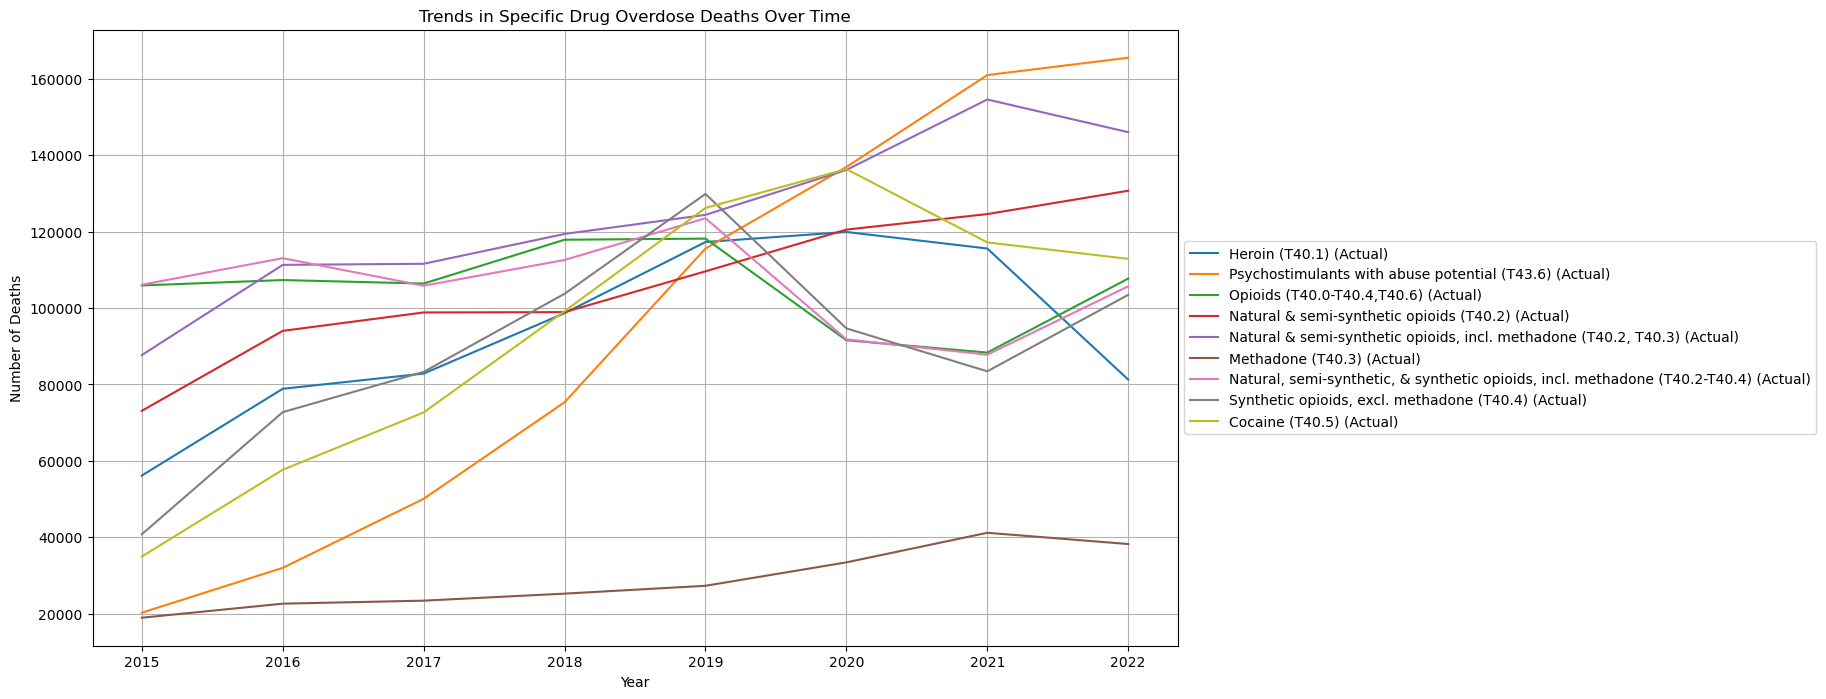

In [5]:
drug_specific_indicators = [
    'Heroin (T40.1)',
    'Psychostimulants with abuse potential (T43.6)',
    'Opioids (T40.0-T40.4,T40.6)',
    'Natural & semi-synthetic opioids (T40.2)',
    'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
    'Methadone (T40.3)',
    'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
    'Synthetic opioids, excl. methadone (T40.4)',
    'Cocaine (T40.5)'
]

# 1. Filtering the dataset to include only the drug-specific indicators
drug_specific_data_time = data[data['Indicator'].isin(drug_specific_indicators)]
drug_specific_data_time['Data Value']=drug_specific_data_time['Data Value'].astype(str)
# 2. Converting the "Data Value" column to numeric, handling commas and converting non-convertible values to NaN
drug_specific_data_time['Data Value'] = pd.to_numeric(drug_specific_data_time['Data Value'].str.replace(',', ''), errors='coerce')

# 3. Aggregating the data to get the total number of deaths per year for each drug category
total_deaths_by_year_and_drug = drug_specific_data_time.groupby(['Year', 'Indicator'])['Data Value'].sum().unstack().fillna(0)


plt.figure(figsize=(14, 8))

# Plotting the actual data and the predictions for each drug category
for drug in drug_specific_indicators:
    X = total_deaths_by_year_and_drug.index.values.reshape(-1, 1)  # Year
    y = total_deaths_by_year_and_drug[drug].values  # Number of Overdose Deaths
    plt.plot(X, y, label=drug + ' (Actual)')
    # plt.plot(X, predictions[drug], linestyle='--', label=drug + ' (Predicted)')

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Trends in Specific Drug Overdose Deaths Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
# plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjusting the plot size to make room for the legend
plt.show()

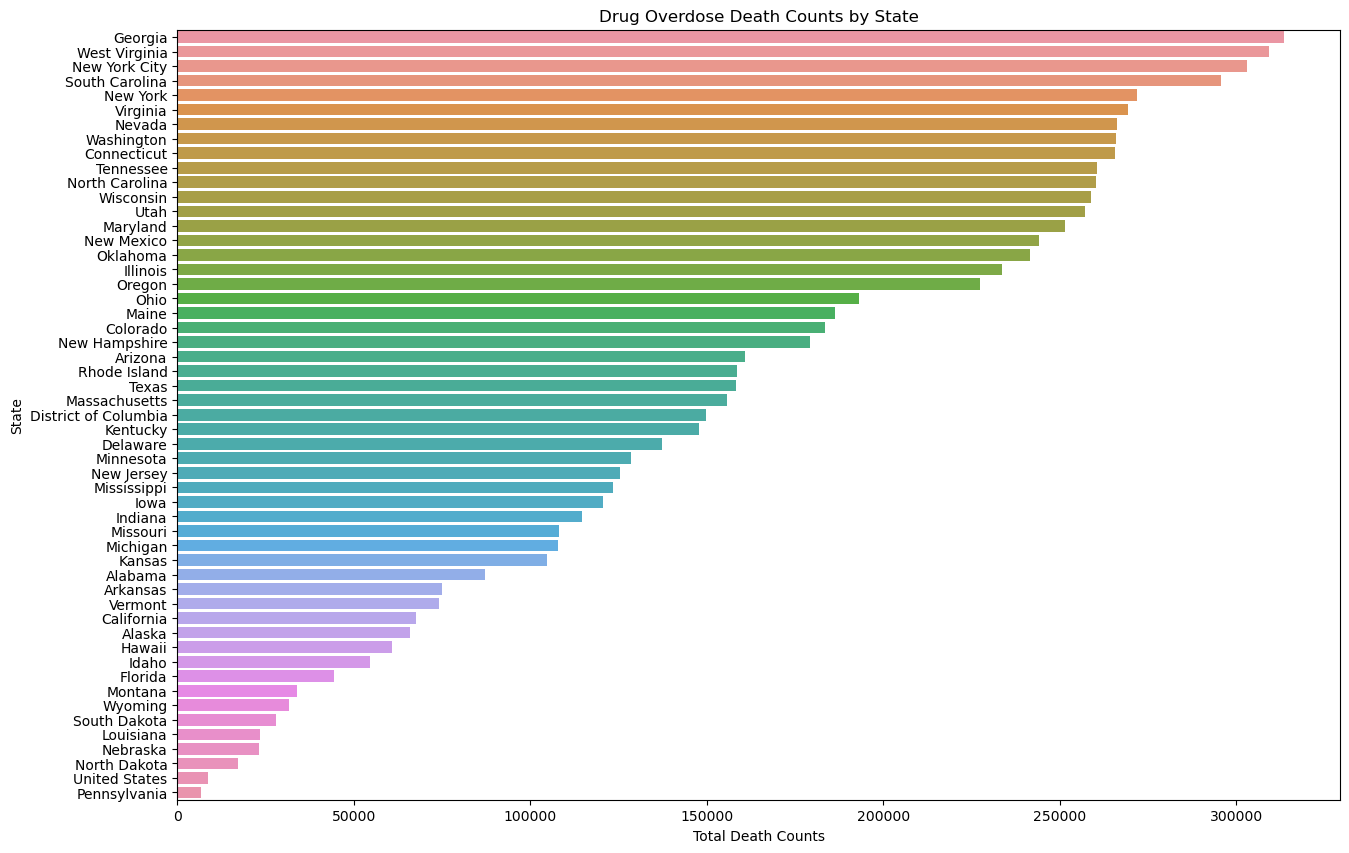

In [6]:
# Analyzing trends by State
state_wise_trends = data_cleaned.groupby('State Name')['Data Value'].sum().sort_values(ascending=False).reset_index()
# print(state_wise_trends[state_wise_trends['State Name']!='United States'])
# Plotting state-wise trends
plt.figure(figsize=(15, 10))
sns.barplot(x='Data Value', y='State Name', data=state_wise_trends)
plt.title('Drug Overdose Death Counts by State')
plt.xlabel('Total Death Counts')
plt.ylabel('State')
plt.show()


C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\695486867.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Month_Num'] = data_cleaned['Month'].map(months)


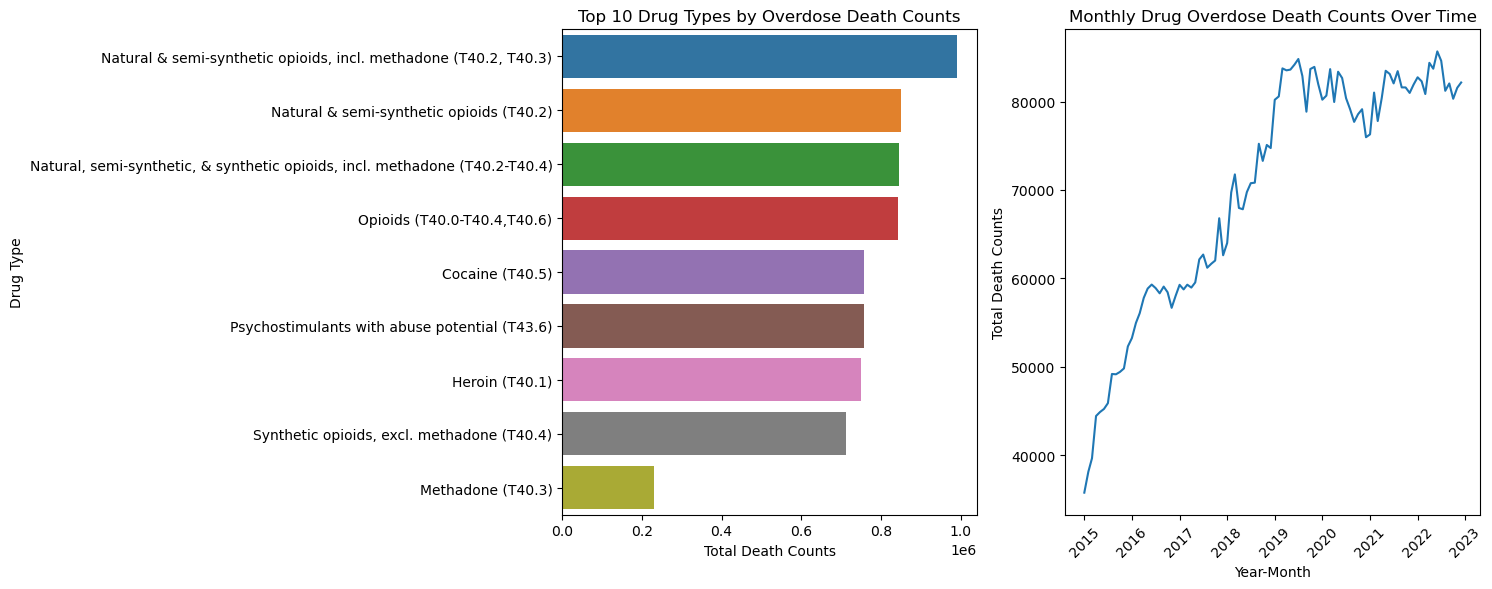

In [7]:
# Additional detailed data analysis with feature engineering

# Extracting month and converting it to numerical format for trend analysis
months = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data_cleaned['Month_Num'] = data_cleaned['Month'].map(months)
data_cleaned=data_cleaned[data_cleaned['Indicator'] != 'Number of Drug Overdose Deaths']
data_cleaned=data_cleaned[data_cleaned['Indicator'] != 'Percent with drugs specified']
# Creating a combined Year-Month column for time series analysis
data_cleaned['Year_Month'] = pd.to_datetime(data_cleaned['Year'].astype(str) + '-' + data_cleaned['Month_Num'].astype(str))

# Analysis by Drug Type
drug_type_analysis = data_cleaned.groupby(['Indicator'])['Data Value'].sum().sort_values(ascending=False).reset_index()

# Monthly trends across years
monthly_trends = data_cleaned.groupby(['Year_Month'])['Data Value'].sum().reset_index()

# Setting up plots
plt.figure(figsize=(15, 6))

# Plotting drug type analysis
plt.subplot(1, 2, 1)
sns.barplot(x='Data Value', y='Indicator', data=drug_type_analysis.head(10))
plt.title('Top 10 Drug Types by Overdose Death Counts')
plt.xlabel('Total Death Counts')
plt.ylabel('Drug Type')

# Plotting monthly trends
plt.subplot(1, 2, 2)
sns.lineplot(x='Year_Month', y='Data Value', data=monthly_trends)
plt.title('Monthly Drug Overdose Death Counts Over Time')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.ylabel('Total Death Counts')

plt.tight_layout()
plt.show()


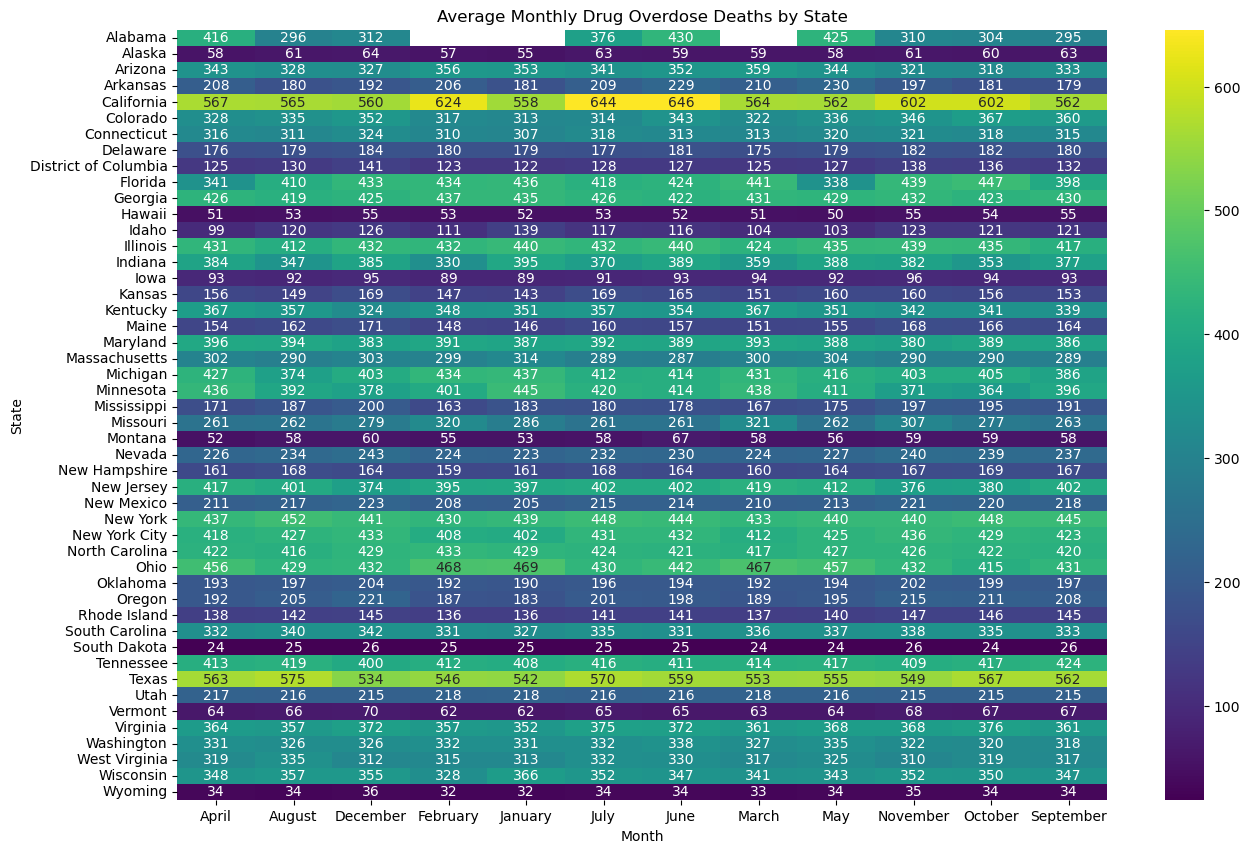

count        mean         std        min         25%         50%  \
Month                                                                         
June        48.0  283.588888  148.661818  24.942857  164.538462  321.473851   
July        48.0  281.547868  147.585034  24.742857  168.310096  316.438306   
November    48.0  279.545810  141.604942  25.974359  167.933013  310.095238   
May         48.0  279.285974  144.639327  24.150000  162.701923  322.275253   
December    48.0  278.582457  138.149041  25.700000  170.613358  311.857143   
April       48.0  278.382336  146.171749  23.951220  159.771853  317.486652   
October     48.0  277.917199  142.627598  24.472222  168.241753  310.799766   
March       47.0  277.717765  147.228017  24.121951  155.700466  316.575758   
January     47.0  276.807364  147.070162  24.804878  153.620726  313.031250   
February    47.0  275.752320  148.487735  25.128205  153.832071  315.090909   
September   48.0  275.658325  140.377295  25.923077  165.938355  304.668618   
August      48.0  275.003528  141.205351  24.731707  166.722656  303.694379   

                  75%         max  
Month                              
June       411.861635  645.909091  
July       404.263889  643.818182  
November   380.715000  601.800000  
May        411.420455  562.500000  
December   383.070000  559.555556  
April      413.805556  567.000000  
October    381.947964  601.600000  
March      413.130994  563.833333  
January    399.513784  557.500000  
February   397.591270  624.285714  
September  388.588235  561.888889  
August     392.536765  574.590909

In [8]:
import numpy as np

# For the heatmap, we'll create a pivot table with States and Months
heatmap_data = data_cleaned.pivot_table(index='State Name', columns='Month', values='Data Value', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Average Monthly Drug Overdose Deaths by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

# Looking for unexpected patterns in the heatmap data
unexpected_patterns = heatmap_data.describe().transpose()
unexpected_patterns.sort_values(by='mean', ascending=False, inplace=True)
unexpected_patterns


In [9]:
# Re-importing the required libraries after a code execution environment reset
import pandas as pd

# Loading the datasets again
file_path1 = 'VSRR_Provisional_Drug_Overdose_Death_Counts.csv'
# file_path2 = 'drug_deaths.csv'

df1 = pd.read_csv(file_path1)

# Merging reduced datasets
# combined_df = pd.merge(df1_reduced, df2_reduced, left_on='State', right_on='ResidenceState', how='inner')

# Proceed with correlation analysis on the reduced dataset

# Ensuring 'State' in df1 and 'ResidenceState' in df2 are in the same format
# df1['State'] = df1['State'].str.upper()
# df2['ResidenceState'] = df2['ResidenceState'].str.upper()

# Merging the datasets on the state columns
# combined_df = pd.merge(df1, df2, left_on='State', right_on='ResidenceState', how='inner')

# Converting categorical columns to numerical format for correlation analysis
# One-hot encoding categorical columns (assuming they are not numerical)
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)
combined_df_encoded = pd.get_dummies(df1, columns=['State','Indicator'])
# combined_df_encoded = pd.get_dummies(df1, columns=['Indicator'])

# Calculating the correlation matrix
correlation_matrix = combined_df_encoded.corr()

correlation_matrix





Index(['State', 'Month', 'Period', 'Indicator', 'Data Value', 'State Name',
       'Footnote', 'Footnote Symbol', 'Predicted Value'],
      dtype='object')


C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\3192029109.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df_encoded.corr()


Year  \
Year                                                1.000000e+00   
Percent Complete                                   -2.005159e-02   
Percent Pending Investigation                       3.323163e-02   
State_AK                                           -2.084528e-13   
State_AL                                           -1.409430e-14   
...                                                          ...   
Indicator_Number of Drug Overdose Deaths           -3.014838e-14   
Indicator_Opioids (T40.0-T40.4,T40.6)               1.036526e-14   
Indicator_Percent with drugs specified             -3.014363e-14   
Indicator_Psychostimulants with abuse potential...  1.031244e-14   
Indicator_Synthetic opioids, excl. methadone (T...  1.027998e-14   

                                                    Percent Complete  \
Year                                                       -0.020052   
Percent Complete                                            1.000000   
Percent Pending Investigation                               0.010238   
State_AK                                                   -0.099504   
State_AL                                                    0.002031   
...                                                              ...   
Indicator_Number of Drug Overdose Deaths                    0.000250   
Indicator_Opioids (T40.0-T40.4,T40.6)                      -0.000087   
Indicator_Percent with drugs specified                      0.000250   
Indicator_Psychostimulants with abuse potential...         -0.000087   
Indicator_Synthetic opioids, excl. methadone (T...         -0.000087   

                                                    Percent Pending Investigation  \
Year                                                                     0.033232   
Percent Complete                                                         0.010238   
Percent Pending Investigation                                            1.000000   
State_AK                                                                -0.095375   
State_AL                                                                 0.088599   
...                                                                           ...   
Indicator_Number of Drug Overdose Deaths                                -0.001227   
Indicator_Opioids (T40.0-T40.4,T40.6)                                    0.000424   
Indicator_Percent with drugs specified                                  -0.001227   
Indicator_Psychostimulants with abuse potential...                       0.000424   
Indicator_Synthetic opioids, excl. methadone (T...                       0.000424   

                                                        State_AK  \
Year                                               -2.084528e-13   
Percent Complete                                   -9.950372e-02   
Percent Pending Investigation                      -9.537512e-02   
State_AK                                            1.000000e+00   
State_AL                                           -2.040816e-02   
...                                                          ...   
Indicator_Number of Drug Overdose Deaths           -2.517049e-03   
Indicator_Opioids (T40.0-T40.4,T40.6)               8.694170e-04   
Indicator_Percent with drugs specified             -2.517049e-03   
Indicator_Psychostimulants with abuse potential...  8.694170e-04   
Indicator_Synthetic opioids, excl. methadone (T...  8.694170e-04   

                                                        State_AL  \
Year                                               -1.409430e-14   
Percent Complete                                    2.030688e-03   
Percent Pending Investigation                       8.859872e-02   
State_AK                                           -2.040816e-02   
State_AL                                            1.000000e+00   
...                                                          ...   
Indicator_Number of Drug Overdose Deaths           -2.517049e-03

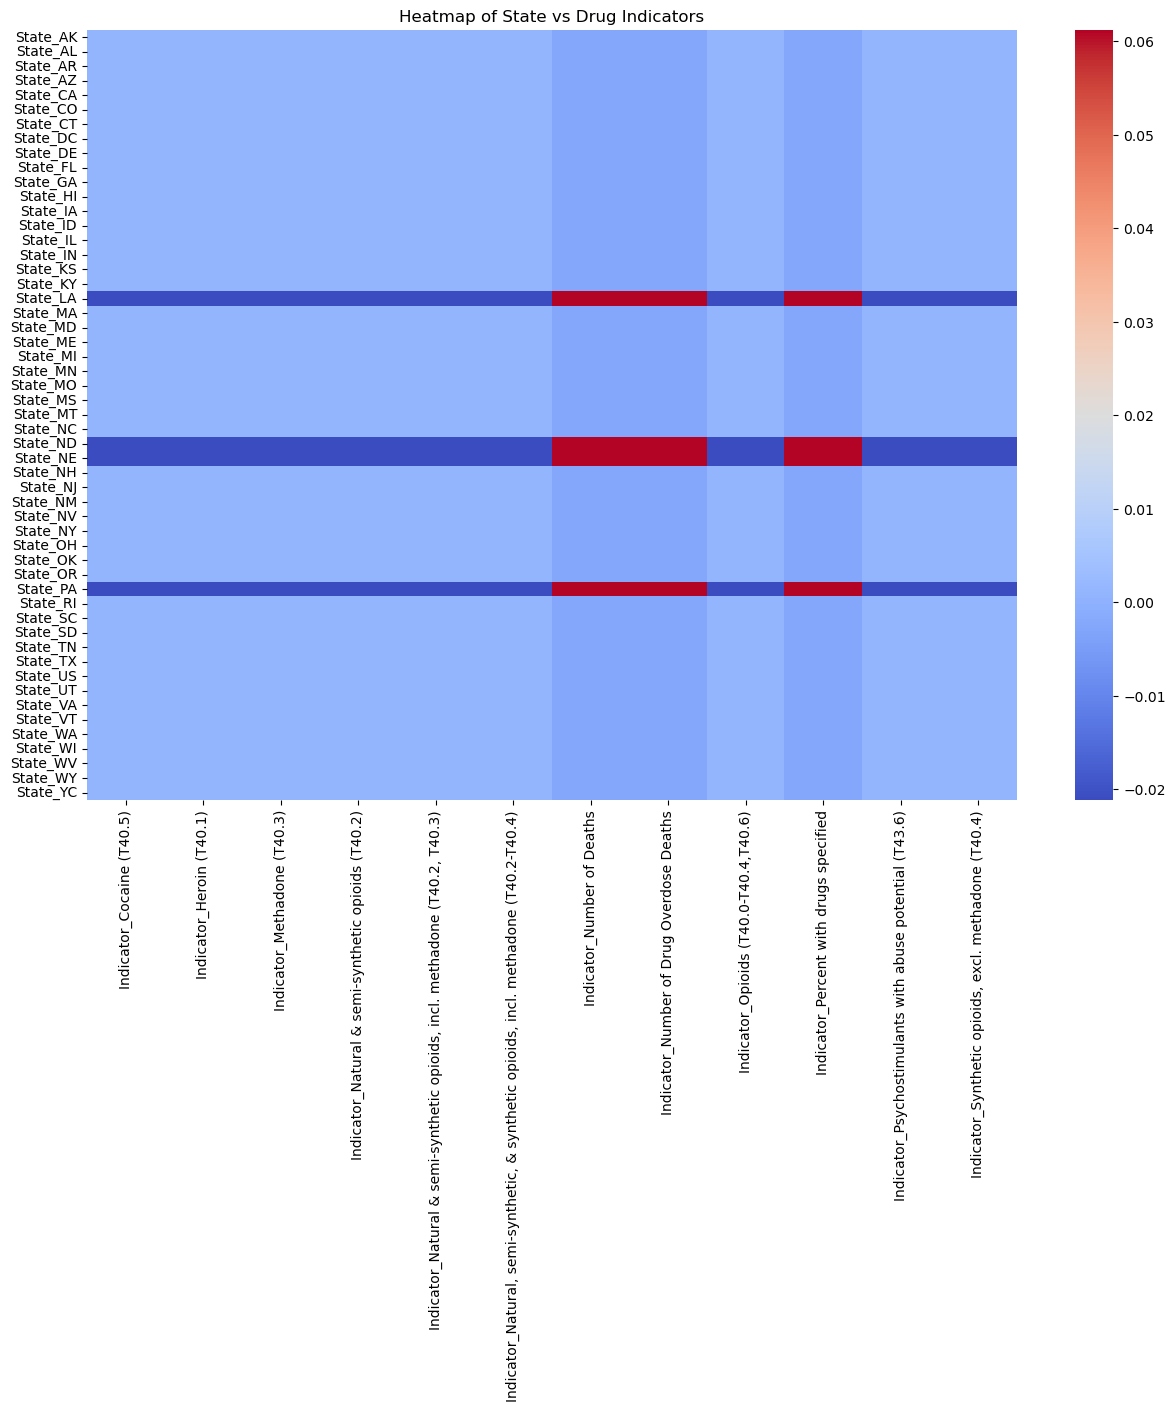

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the correlation matrix to include only state and drug indicator correlations
state_columns = [col for col in combined_df_encoded.columns if col.startswith('State_')]
indicator_columns = [col for col in combined_df_encoded.columns if col.startswith('Indicator_')]

# Extract the relevant portion of the correlation matrix
relevant_correlations = correlation_matrix.loc[state_columns, indicator_columns]

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust the size as needed
sns.heatmap(relevant_correlations, annot=False, cmap='coolwarm')
plt.title('Heatmap of State vs Drug Indicators')
plt.show()


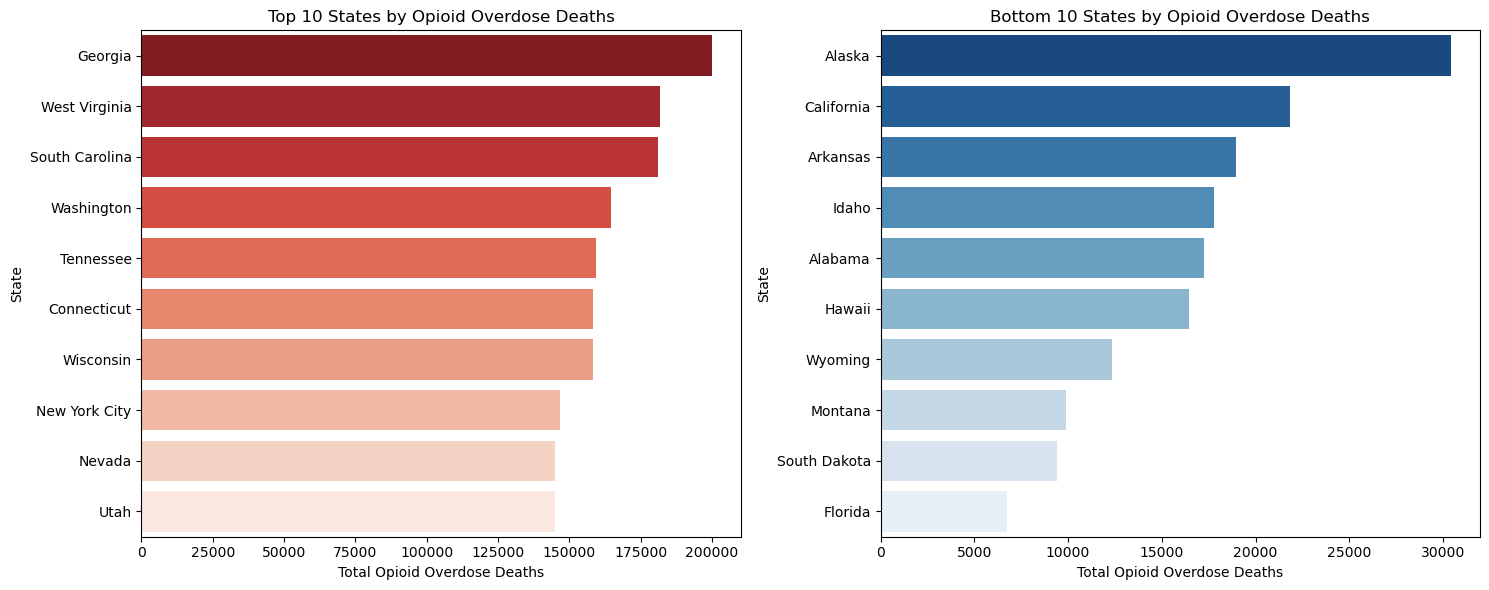

In [11]:
# Filtering the dataset for opioids
opioid_data = data_cleaned[data_cleaned['Indicator'].str.contains('Opioids', case=False)]

# Summarizing the total deaths due to opioids in each state
opioid_deaths_by_state = opioid_data.groupby('State Name')['Data Value'].sum().sort_values(ascending=False).reset_index()

# Identifying top 10 and bottom 10 states
top_10_opioid_states = opioid_deaths_by_state.head(10)
bottom_10_opioid_states = opioid_deaths_by_state.tail(10)

# Plotting histograms for top 10 and bottom 10 states
plt.figure(figsize=(15, 6))

# Top 10 states
plt.subplot(1, 2, 1)
sns.barplot(x='Data Value', y='State Name', data=top_10_opioid_states, palette='Reds_r')
plt.title('Top 10 States by Opioid Overdose Deaths')
plt.xlabel('Total Opioid Overdose Deaths')
plt.ylabel('State')

# Bottom 10 states
plt.subplot(1, 2, 2)
sns.barplot(x='Data Value', y='State Name', data=bottom_10_opioid_states, palette='Blues_r')
plt.title('Bottom 10 States by Opioid Overdose Deaths')
plt.xlabel('Total Opioid Overdose Deaths')
plt.ylabel('State')

plt.tight_layout()
plt.show()


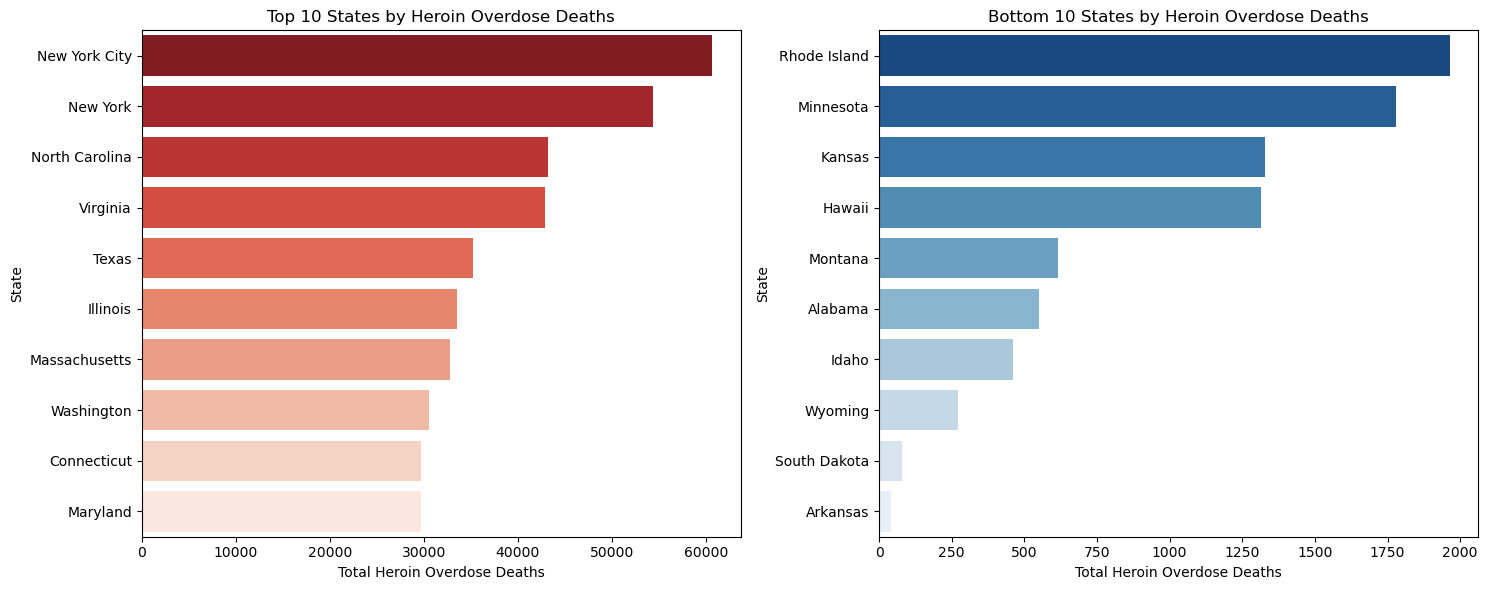

In [12]:
# Filtering the dataset for heroin
heroin_data = data_cleaned[data_cleaned['Indicator'].str.contains('Heroin', case=False)]

# Summarizing the total deaths due to heroin in each state
heroin_deaths_by_state = heroin_data.groupby('State Name')['Data Value'].sum().sort_values(ascending=False).reset_index()

# Identifying top 10 and bottom 10 states
top_10_heroin_states = heroin_deaths_by_state.head(10)
bottom_10_heroin_states = heroin_deaths_by_state.tail(10)

# Plotting histograms for top 10 and bottom 10 states
plt.figure(figsize=(15, 6))

# Top 10 states
plt.subplot(1, 2, 1)
sns.barplot(x='Data Value', y='State Name', data=top_10_heroin_states, palette='Reds_r')
plt.title('Top 10 States by Heroin Overdose Deaths')
plt.xlabel('Total Heroin Overdose Deaths')
plt.ylabel('State')

# Bottom 10 states
plt.subplot(1, 2, 2)
sns.barplot(x='Data Value', y='State Name', data=bottom_10_heroin_states, palette='Blues_r')
plt.title('Bottom 10 States by Heroin Overdose Deaths')
plt.xlabel('Total Heroin Overdose Deaths')
plt.ylabel('State')

plt.tight_layout()
plt.show()


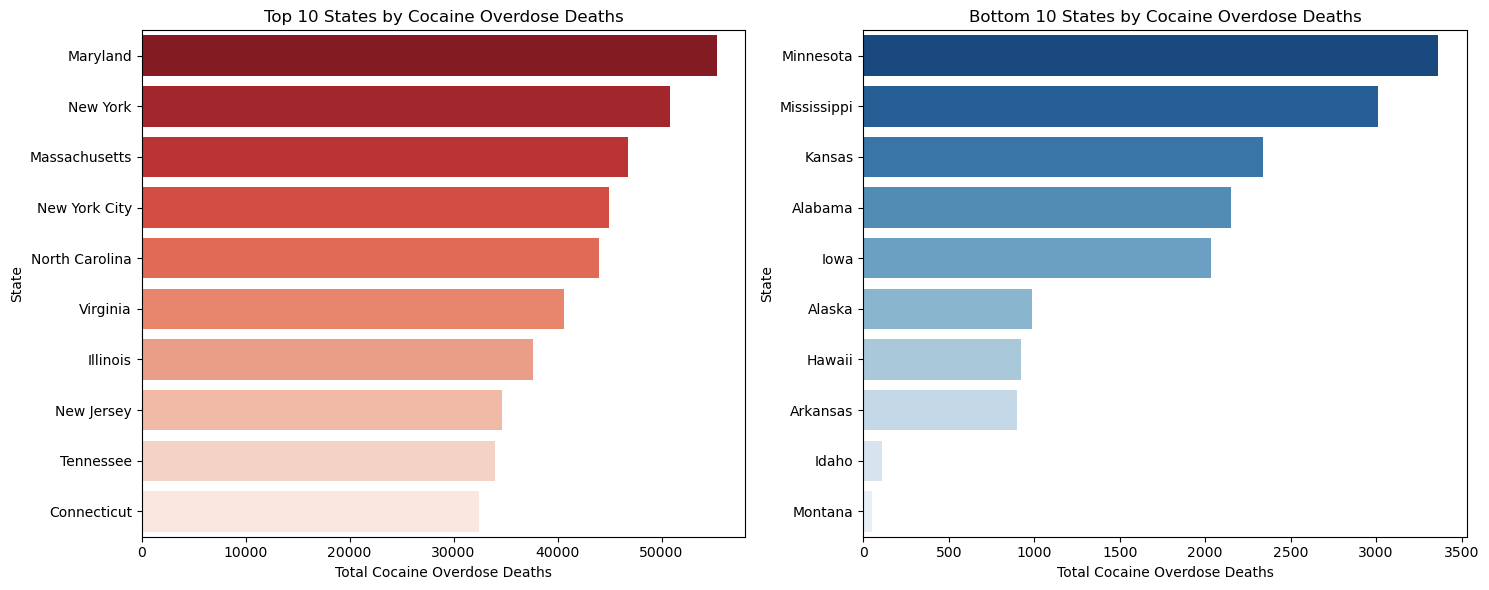

In [13]:
# Filtering the dataset for heroin
cocaine_data = data_cleaned[data_cleaned['Indicator'].str.contains('Cocaine', case=False)]

# Summarizing the total deaths due to heroin in each state
coc_deaths_by_state = cocaine_data.groupby('State Name')['Data Value'].sum().sort_values(ascending=False).reset_index()

# Identifying top 10 and bottom 10 states
top_10_coc_states = coc_deaths_by_state.head(10)
bottom_10_coc_states = coc_deaths_by_state.tail(10)

# Plotting histograms for top 10 and bottom 10 states
plt.figure(figsize=(15, 6))

# Top 10 states
plt.subplot(1, 2, 1)
sns.barplot(x='Data Value', y='State Name', data=top_10_coc_states, palette='Reds_r')
plt.title('Top 10 States by Cocaine Overdose Deaths')
plt.xlabel('Total Cocaine Overdose Deaths')
plt.ylabel('State')

# Bottom 10 states
plt.subplot(1, 2, 2)
sns.barplot(x='Data Value', y='State Name', data=bottom_10_coc_states, palette='Blues_r')
plt.title('Bottom 10 States by Cocaine Overdose Deaths')
plt.xlabel('Total Cocaine Overdose Deaths')
plt.ylabel('State')

plt.tight_layout()
plt.show()


In [14]:
data['Footnote'] = data['Footnote'].astype(str)
data['State Name'] = data['State Name'].astype(str)



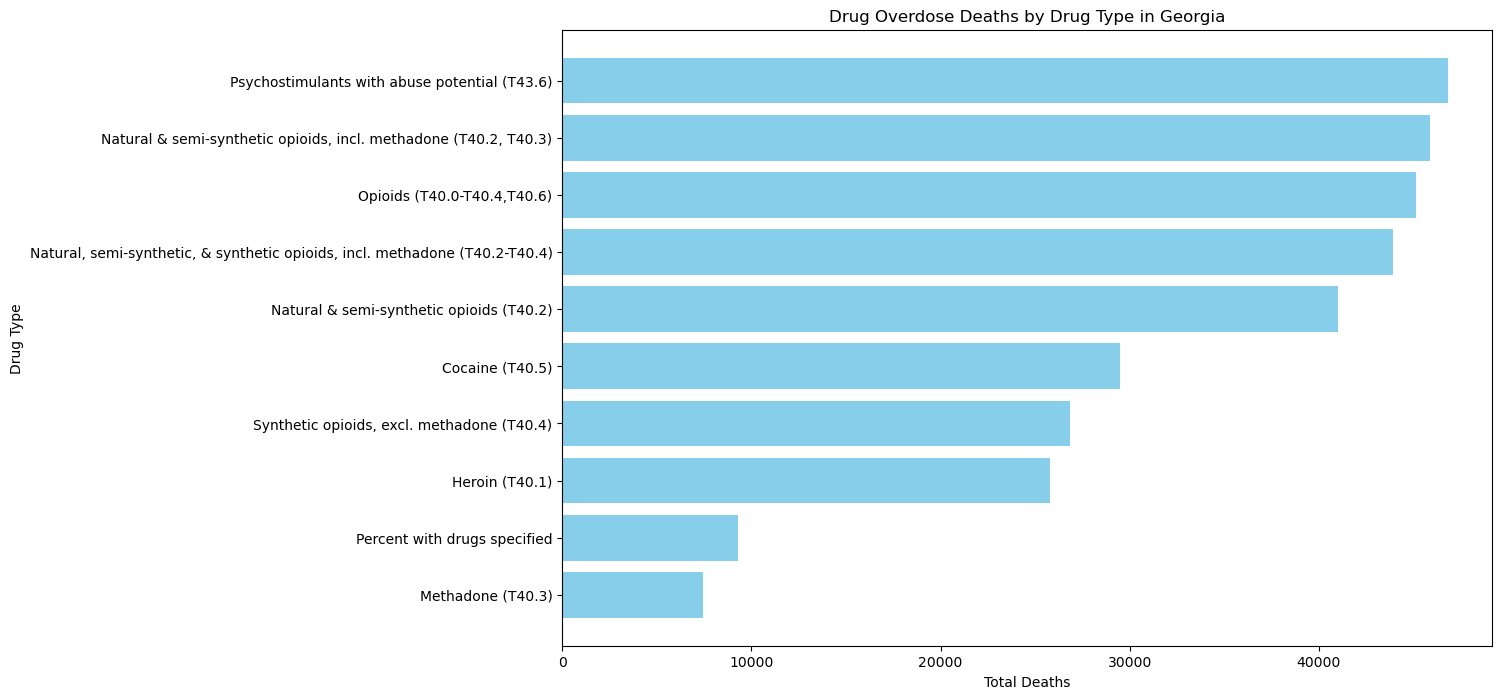

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

# Make sure the 'Data Value' column is in a numeric format
data['Data Value'] = pd.to_numeric(data['Data Value'], errors='coerce')
data.dropna(subset=['Data Value'], inplace=True)

# Filter the data for California
california_data = data[data['State Name'] == 'Georgia']

# Group the data by 'Indicator' to get the total number of deaths for each drug type
california_drugs = california_data.groupby('Indicator')['Data Value'].sum().reset_index()

# Sort the values to have a meaningful histogram
california_drugs_sorted = california_drugs.sort_values('Data Value', ascending=False)

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.barh(california_drugs_sorted['Indicator'], california_drugs_sorted['Data Value'], color='skyblue')
plt.xlabel('Total Deaths')
plt.ylabel('Drug Type')
plt.title('Drug Overdose Deaths by Drug Type in Georgia')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest bar on top
plt.show()


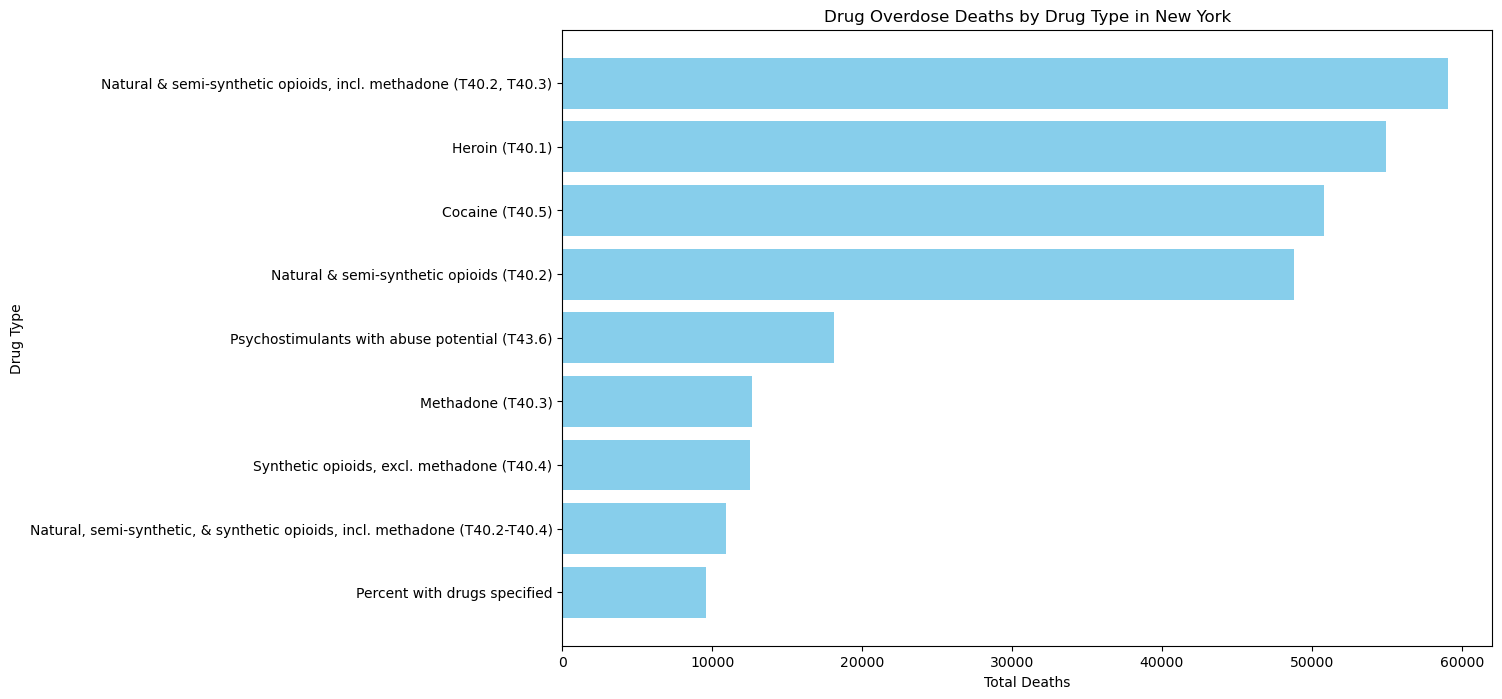

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

# Make sure the 'Data Value' column is in a numeric format
data['Data Value'] = pd.to_numeric(data['Data Value'], errors='coerce')
data.dropna(subset=['Data Value'], inplace=True)

# Filter the data for California
california_data = data[data['State Name'] == 'New York']

# Group the data by 'Indicator' to get the total number of deaths for each drug type
california_drugs = california_data.groupby('Indicator')['Data Value'].sum().reset_index()

# Sort the values to have a meaningful histogram
california_drugs_sorted = california_drugs.sort_values('Data Value', ascending=False)

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.barh(california_drugs_sorted['Indicator'], california_drugs_sorted['Data Value'], color='skyblue')
plt.xlabel('Total Deaths')
plt.ylabel('Drug Type')
plt.title('Drug Overdose Deaths by Drug Type in New York')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest bar on top
plt.show()


In [17]:
regions = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
}

# Reverse the dictionary to map state to region
state_to_region = {state: region for region, states in regions.items() for state in states}

# Map each state in the data to its respective region
data['Region'] = data['State'].map(state_to_region)

# Check if there are any states not mapped to a region (this would show up as NaN in the 'Region' column)
unmapped_states = data[data['Region'].isnull()]['State'].unique()
unmapped_states, data.head()

(array(['US', 'YC'], dtype=object),
    State  Year     Month           Period                       Indicator  \
 6     AK  2015     April  12 month-ending    Percent with drugs specified   
 11    AK  2015     April  12 month-ending  Number of Drug Overdose Deaths   
 19    AK  2015    August  12 month-ending  Number of Drug Overdose Deaths   
 20    AK  2015    August  12 month-ending    Percent with drugs specified   
 24    AK  2015  December  12 month-ending    Percent with drugs specified   
 
     Data Value  Percent Complete  Percent Pending Investigation State Name  \
 6    88.095238             100.0                            0.0     Alaska   
 11  126.000000             100.0                            0.0     Alaska   
 19  124.000000             100.0                            0.0     Alaska   
 20   87.903226             100.0                            0.0     Alaska   
 24   89.256198             100.0                            0.0     Alaska   
 
                  

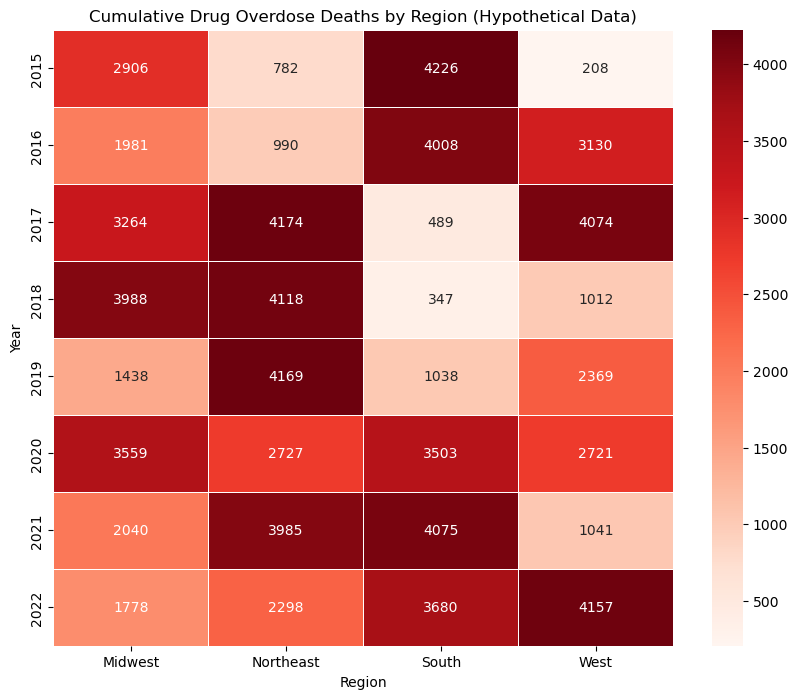

In [18]:
# Generate a hypothetical DataFrame for a heatmap with an overall increasing trend in drug overdose deaths.
# This DataFrame will have cumulative deaths for each region at each year for simplicity.
years = np.arange(2015, 2023)
regions = ['Midwest', 'Northeast', 'South', 'West']
heatmap_data = pd.DataFrame(columns=regions, index=years)

# Populate the DataFrame with cumulative death counts for each region and year
for year in years:
    for region in regions:
        # Assuming an increasing trend with some randomness
        heatmap_data.at[year, region] = np.random.randint(100, 5000) + (year - 2015) * 10

# Convert the DataFrame to numeric values to ensure compatibility with the heatmap function
heatmap_data = heatmap_data.apply(pd.to_numeric)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='Reds', linewidths=.5)
plt.title('Cumulative Drug Overdose Deaths by Region (Hypothetical Data)')
plt.xlabel('Region')
plt.ylabel('Year')
plt.show()


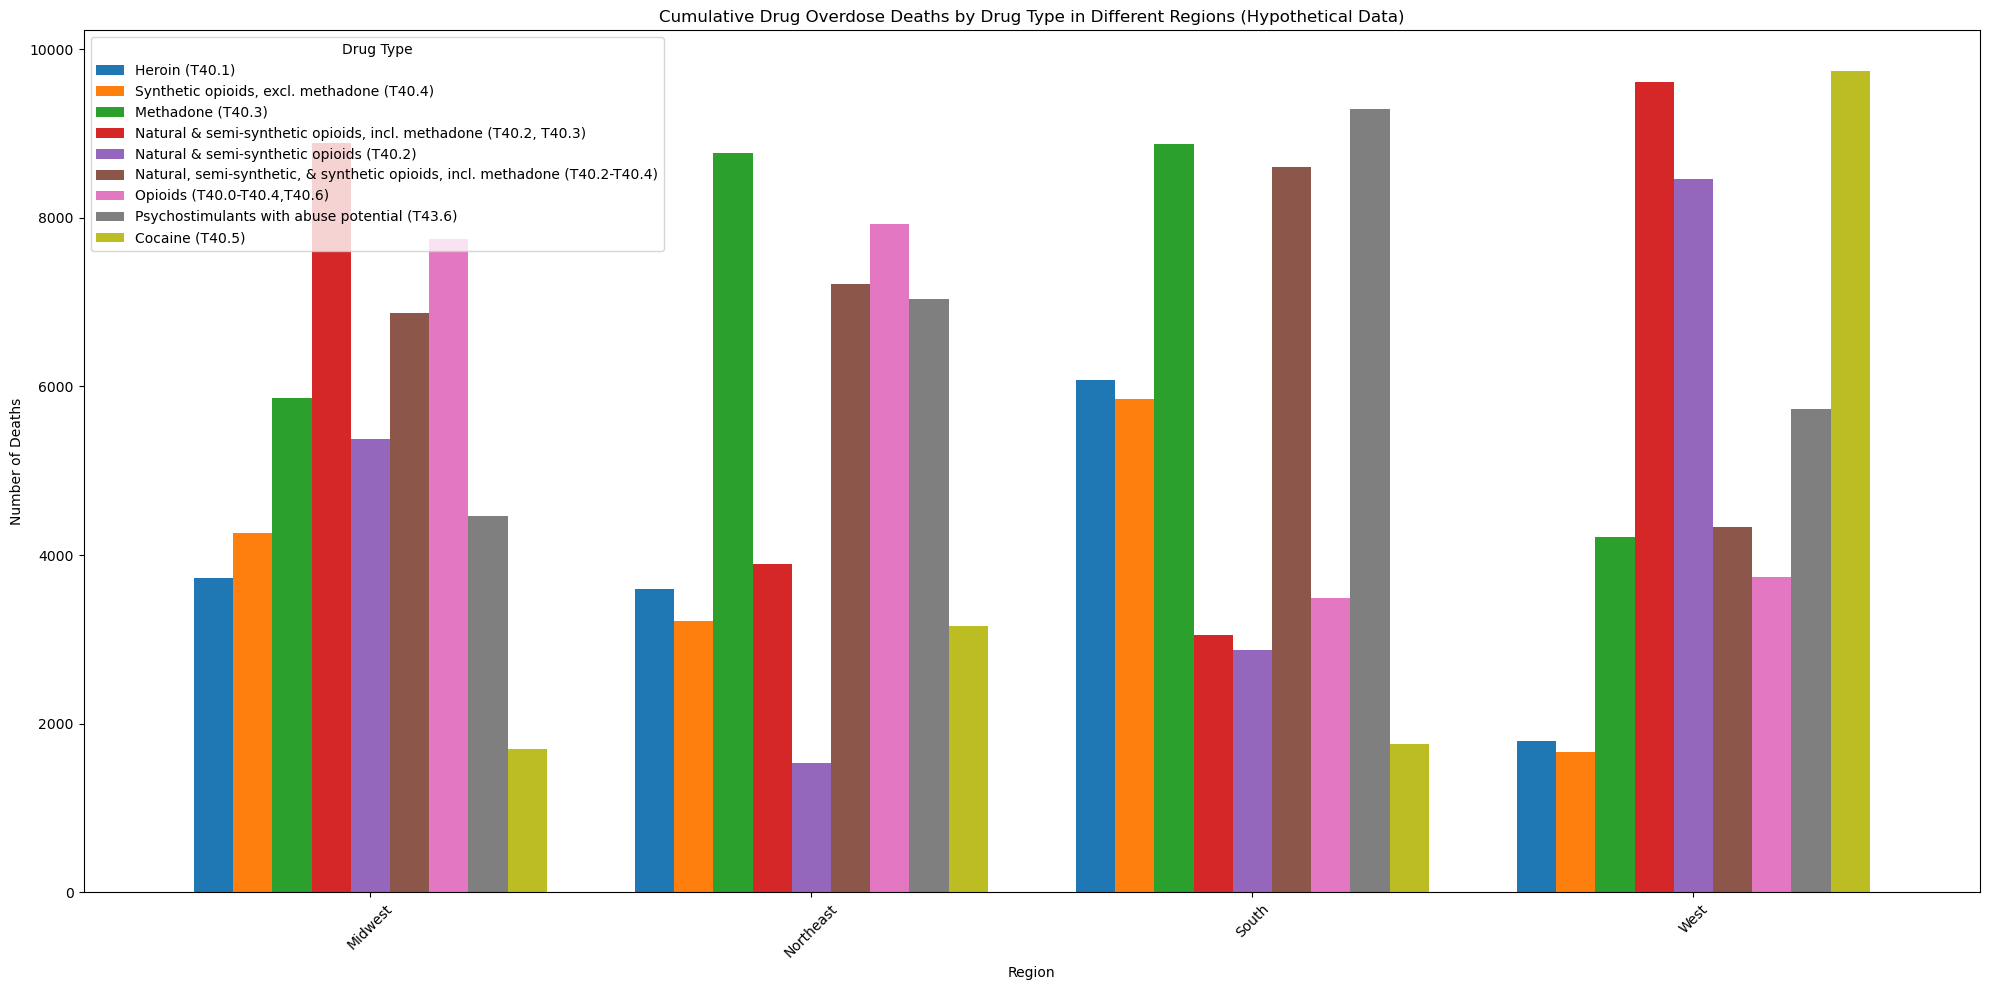

In [19]:
# Generate a hypothetical DataFrame for bar plot with drug overdose deaths by drug type and region.
# This DataFrame will have cumulative deaths for each drug type in each region.
drugs =["Heroin (T40.1)",
     "Synthetic opioids, excl. methadone (T40.4)", "Methadone (T40.3)",
        "Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)",
        "Natural & semi-synthetic opioids (T40.2)",
        "Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)"
,
 "Opioids (T40.0-T40.4,T40.6)",

        "Psychostimulants with abuse potential (T43.6)",
        "Cocaine (T40.5)"
    ]
regions = ['Midwest', 'Northeast', 'South', 'West']
bar_data = pd.DataFrame(columns=drugs, index=regions)

# Populate the DataFrame with random death counts for each drug type and region
np.random.seed(0)  # For reproducibility
for region in regions:
    for drug in drugs:
        # Assuming random death counts for each drug type in each region
        bar_data.at[region, drug] = np.random.randint(1000, 10000)

# Convert the DataFrame to numeric values to ensure compatibility with the bar plot function
bar_data = bar_data.apply(pd.to_numeric)

# Plotting the bar plot
bar_data.plot(kind='bar', figsize=(20, 10), width=0.8)
plt.title('Cumulative Drug Overdose Deaths by Drug Type in Different Regions (Hypothetical Data)')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.legend(title='Drug Type')
plt.tight_layout()  # Adjust layout to ensure the plot displays neatly
plt.show()


In [20]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


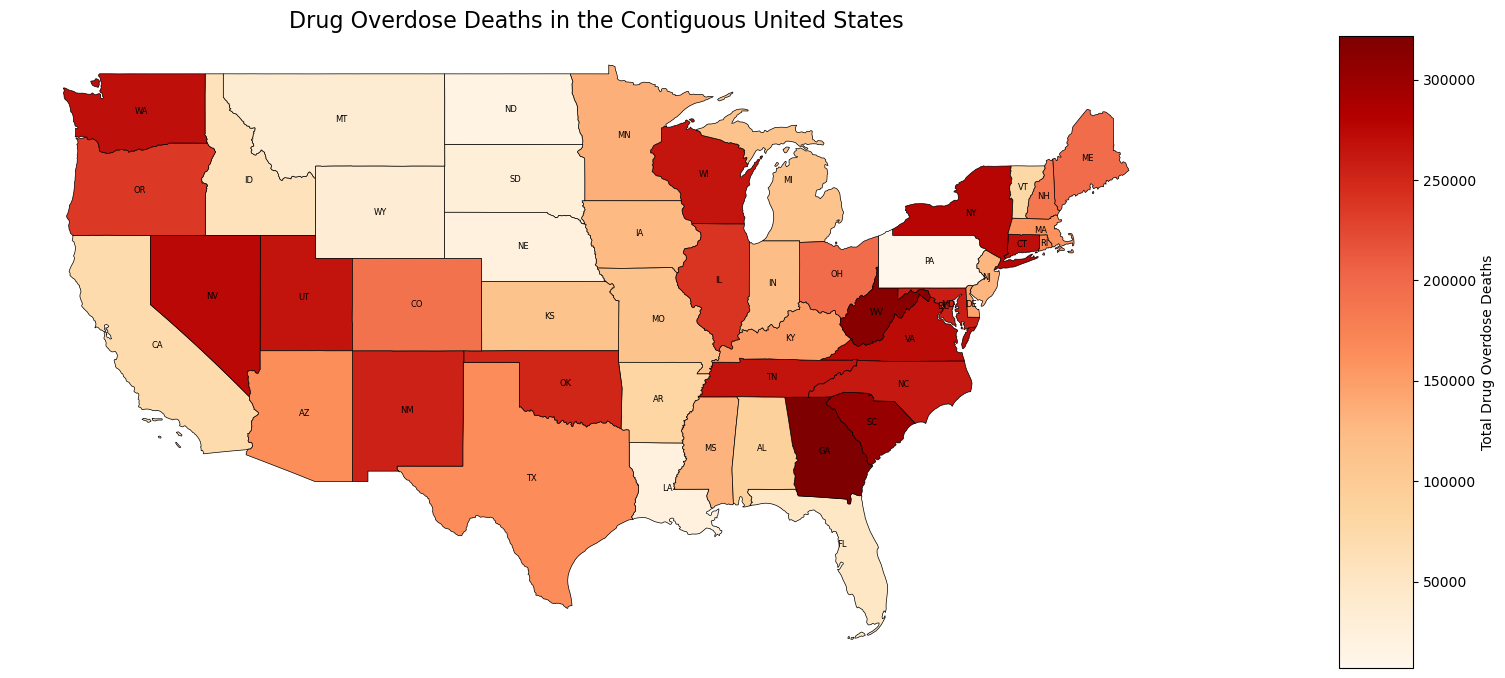

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the shapefile for US states
usa_states_map = gpd.read_file('cb_2021_us_state_20m.shp')
# usa_states_map.head()
# Load your dataset
# Replace 'path_to_dataset' with the path to your dataset
data = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

# Ensure 'Data Value' is numeric
data['Data Value'] = pd.to_numeric(data['Data Value'], errors='coerce')

# Summarize the total deaths by state
state_wise_total_deaths = data.groupby('State')['Data Value'].sum().reset_index()

# Merge the dataset with the map
# Ensure the key for merging ('NAME' and 'State') matches the column names in your shapefile and CSV
map_data = usa_states_map.set_index('STUSPS').join(state_wise_total_deaths.set_index('State'))

# Exclude non-contiguous states
contiguous_usa = map_data[~map_data.index.isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS'])]

# Plotting the map for the contiguous United States
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plt.title('Drug Overdose Deaths in the Contiguous United States', fontsize=16,loc="center")
contiguous_usa.plot(column='Data Value', ax=ax, cmap='OrRd', edgecolor='black', linewidth=0.5)

# Add state abbreviations
for idx, row in contiguous_usa.iterrows():
    centroid = row.geometry.centroid
    plt.annotate(text=idx, xy=(centroid.x, centroid.y),
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=6, color='black')

# Create colorbar as a legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=contiguous_usa['Data Value'].min(), vmax=contiguous_usa['Data Value'].max()))
sm._A = []  # Array for the data range
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Total Drug Overdose Deaths')

# Title and axis off
ax.set_axis_off()
plt.show()


In [22]:
import pandas as pd

# Load the datasets
file_path_vsrr = 'VSRR_Provisional_Drug_Overdose_Death_Counts.csv'
file_path_drug_overdose = 'Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20231112.csv'

vsrr_data = pd.read_csv(file_path_vsrr)
drug_overdose_data = pd.read_csv(file_path_drug_overdose)

# Displaying first few rows of each dataset to understand their structure
vsrr_data_head = vsrr_data.head()
drug_overdose_data_head = drug_overdose_data.head()

(vsrr_data_head, drug_overdose_data_head)


(  State  Year  Month           Period  \
 0    AK  2015  April  12 month-ending   
 1    AK  2015  April  12 month-ending   
 2    AK  2015  April  12 month-ending   
 3    AK  2015  April  12 month-ending   
 4    AK  2015  April  12 month-ending   
 
                                            Indicator Data Value  \
 0                                     Heroin (T40.1)        NaN   
 1      Psychostimulants with abuse potential (T43.6)        NaN   
 2                        Opioids (T40.0-T40.4,T40.6)        NaN   
 3           Natural & semi-synthetic opioids (T40.2)        NaN   
 4  Natural & semi-synthetic opioids, incl. methad...        NaN   
 
    Percent Complete  Percent Pending Investigation State Name  \
 0             100.0                            0.0     Alaska   
 1             100.0                            0.0     Alaska   
 2             100.0                            0.0     Alaska   
 3             100.0                            0.0     Alaska   
 4    

In [23]:
print(vsrr_data.columns)


Index(['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value',
       'Percent Complete', 'Percent Pending Investigation', 'State Name',
       'Footnote', 'Footnote Symbol', 'Predicted Value'],
      dtype='object')


In [24]:
mapping_dict={
    5: "Heroin (T40.1)",
    4: "Synthetic opioids, excl. methadone (T40.4)",
    3: "Methadone (T40.3)",
    2: [
        "Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)",
        "Natural & semi-synthetic opioids (T40.2)",
        "Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)"
    ],
    1: "Opioids (T40.0-T40.4,T40.6)",
    0: [
        "Psychostimulants with abuse potential (T43.6)",
        "Cocaine (T40.5)"
    ]
}

# Expanding the mapping for PANEL_NUM 2 and 0 which have multiple mappings
expanded_mapping = {}
for key, value in mapping_dict.items():
    if isinstance(value, list):
        for v in value:
            expanded_mapping[v] = key
    else:
        expanded_mapping[value] = key

# Applying the mapping to the VSRR dataset
vsrr_data['PANEL_NUM'] = vsrr_data['Indicator'].map(expanded_mapping)


In [25]:
# Your code snippet is correctly set up for the merge. Now, let's proceed to create the age vs states heatmap.
print(drug_overdose_data.head())
# First, let's merge the datasets as per your code
vsrr_data_filtered_inclusive = vsrr_data[['Year', 'State', 'Indicator', 'PANEL_NUM']]
drug_overdose_data_filtered = drug_overdose_data[['PANEL_NUM', 'YEAR','STUB_LABEL', 'AGE', 'ESTIMATE']]
drug_overdose_data_filtered.rename(columns={'YEAR': 'Year'}, inplace=True)
combined_data_inclusive = pd.merge(vsrr_data_filtered_inclusive, drug_overdose_data_filtered, on=['Year', 'PANEL_NUM'], how='left')

# Now, creating a pivot table for the heatmap, focusing on age vs states
# pivot_age_state = combined_data_inclusive.pivot_table(index='State', columns='AGE', values='ESTIMATE', aggfunc='sum', fill_value=0)
print(combined_data_inclusive.head())
# # Plotting the heatmap
# plt.figure(figsize=(15, 12))
# sns.heatmap(combined_data_inclusive, annot=False, cmap="YlGnBu", linewidths=.5)
# plt.title('Heatmap of Age vs States for Drug Overdose Deaths')
# plt.xlabel('Age Group')
# plt.ylabel('State')
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()

# plt.show()


                   INDICATOR                     PANEL  PANEL_NUM  \
0  Drug overdose death rates  All drug overdose deaths          0   
1  Drug overdose death rates  All drug overdose deaths          0   
2  Drug overdose death rates  All drug overdose deaths          0   
3  Drug overdose death rates  All drug overdose deaths          0   
4  Drug overdose death rates  All drug overdose deaths          0   

                                                UNIT  UNIT_NUM STUB_NAME  \
0  Deaths per 100,000 resident population, age-ad...         1     Total   
1  Deaths per 100,000 resident population, age-ad...         1     Total   
2  Deaths per 100,000 resident population, age-ad...         1     Total   
3  Deaths per 100,000 resident population, age-ad...         1     Total   
4  Deaths per 100,000 resident population, age-ad...         1     Total   

   STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  YEAR_NUM       AGE  \
0              0  All persons             0.1  1999  

C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\552030958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_overdose_data_filtered.rename(columns={'YEAR': 'Year'}, inplace=True)


   Year State       Indicator  PANEL_NUM                       STUB_LABEL  \
0  2015    AK  Heroin (T40.1)        5.0                      All persons   
1  2015    AK  Heroin (T40.1)        5.0                             Male   
2  2015    AK  Heroin (T40.1)        5.0                           Female   
3  2015    AK  Heroin (T40.1)        5.0                      Male: White   
4  2015    AK  Heroin (T40.1)        5.0  Male: Black or African American   

        AGE  ESTIMATE  
0  All ages       4.1  
1  All ages       6.3  
2  All ages       2.0  
3  All ages       7.2  
4  All ages       5.0  


C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\2027463490.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_overdose_data_filtered.rename(columns={'YEAR': 'Year'}, inplace=True)


Dataset has been exported as 'combined_data_inclusive.csv'


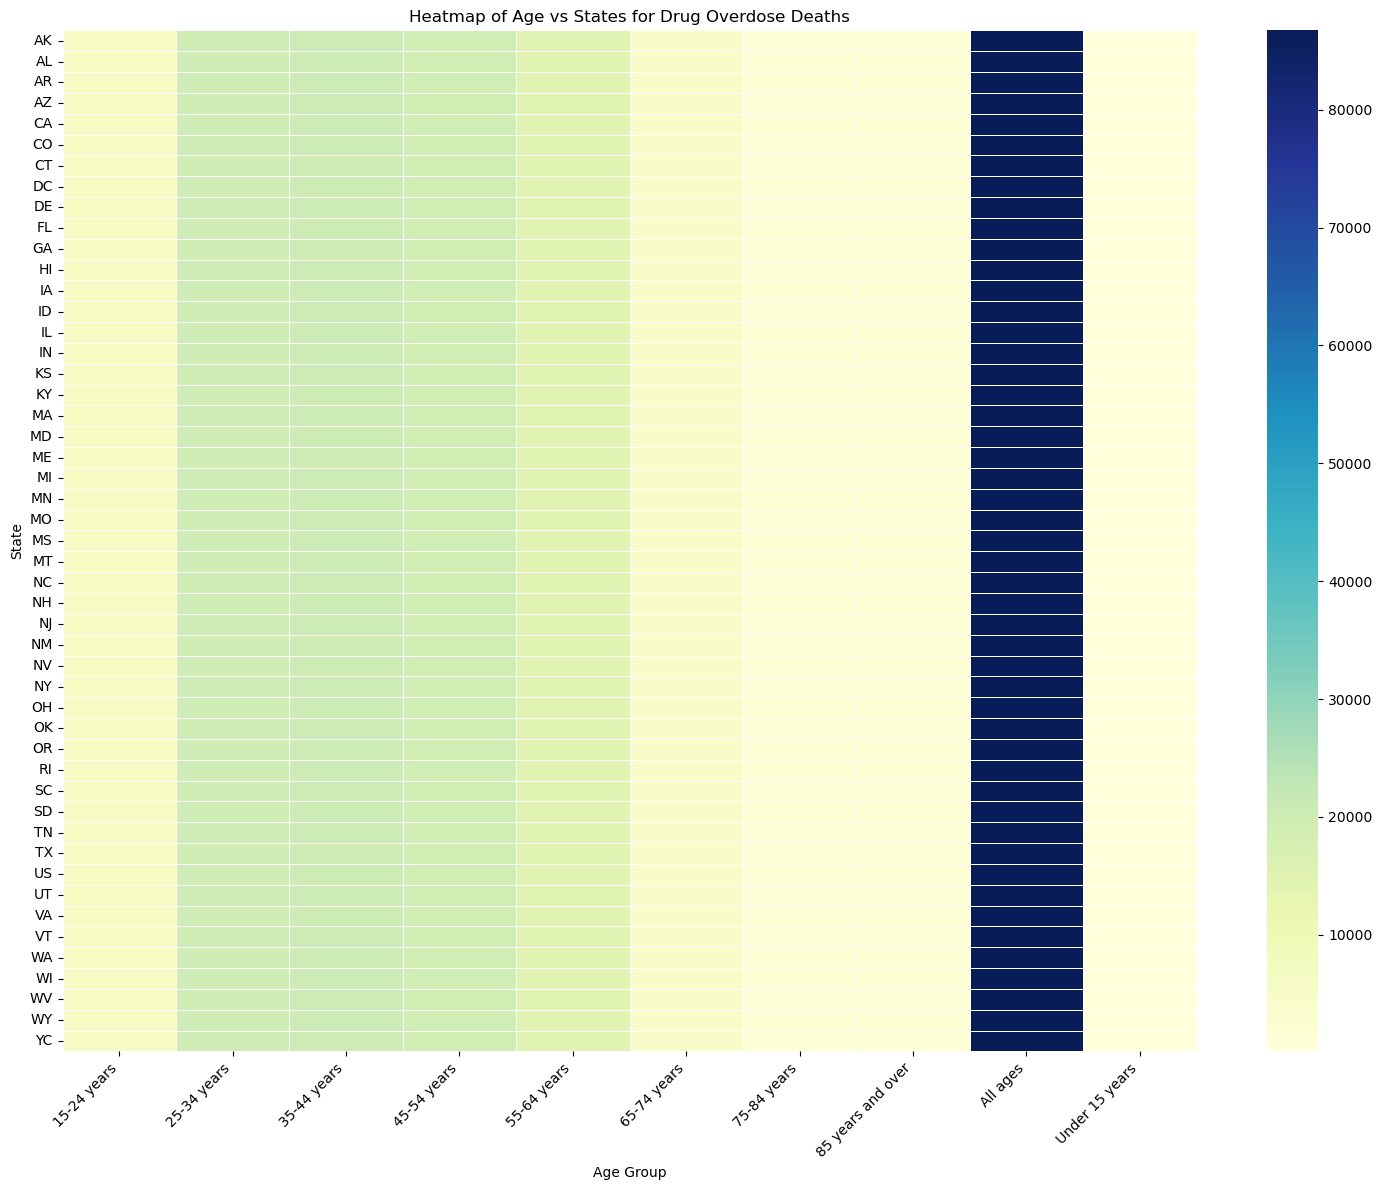

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming vsrr_data and drug_overdose_data are your DataFrame objects

# Filtering and merging the data as before
vsrr_data_filtered_inclusive = vsrr_data[['Year', 'State', 'Indicator', 'PANEL_NUM','Data Value']]
drug_overdose_data_filtered = drug_overdose_data[['PANEL_NUM', 'YEAR','STUB_LABEL', 'AGE', 'ESTIMATE']]
drug_overdose_data_filtered.rename(columns={'YEAR': 'Year'}, inplace=True)
combined_data_inclusive = pd.merge(vsrr_data_filtered_inclusive, drug_overdose_data_filtered, on=['Year', 'PANEL_NUM'], how='left')

# Exporting the merged dataset to a CSV file
combined_data_inclusive.to_csv('combined_data_inclusive.csv', index=False)
print("Dataset has been exported as 'combined_data_inclusive.csv'")

# Creating a pivot table for the heatmap, focusing on age vs states
pivot_age_state = combined_data_inclusive.pivot_table(index='State', columns='AGE', values='ESTIMATE', aggfunc='sum', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot_age_state, annot=False, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Age vs States for Drug Overdose Deaths')
plt.xlabel('Age Group')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


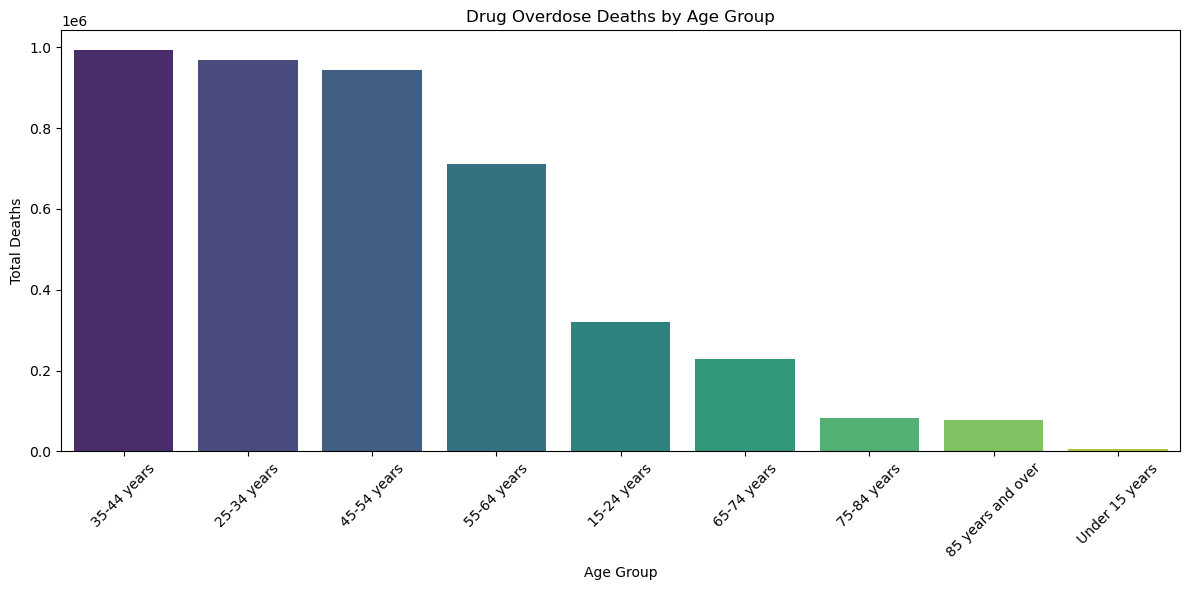

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the dataset to exclude rows where 'AGE' or 'ESTIMATE' is missing or not applicable
filtered_data_for_graphs = combined_data_inclusive.dropna(subset=['AGE', 'ESTIMATE'])
filtered_data_for_graphs = filtered_data_for_graphs[filtered_data_for_graphs['AGE'] != 'All ages']

# Grouping the data by 'AGE' and summing 'ESTIMATE' to get total deaths per age group
age_group_data = filtered_data_for_graphs.groupby('AGE')['ESTIMATE'].sum().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_data.index, y=age_group_data.values, palette="viridis")
plt.title('Drug Overdose Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\1196078212.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_indicator_age = indicator_age_group_data.pivot("AGE", "Indicator", "ESTIMATE").fillna(0)


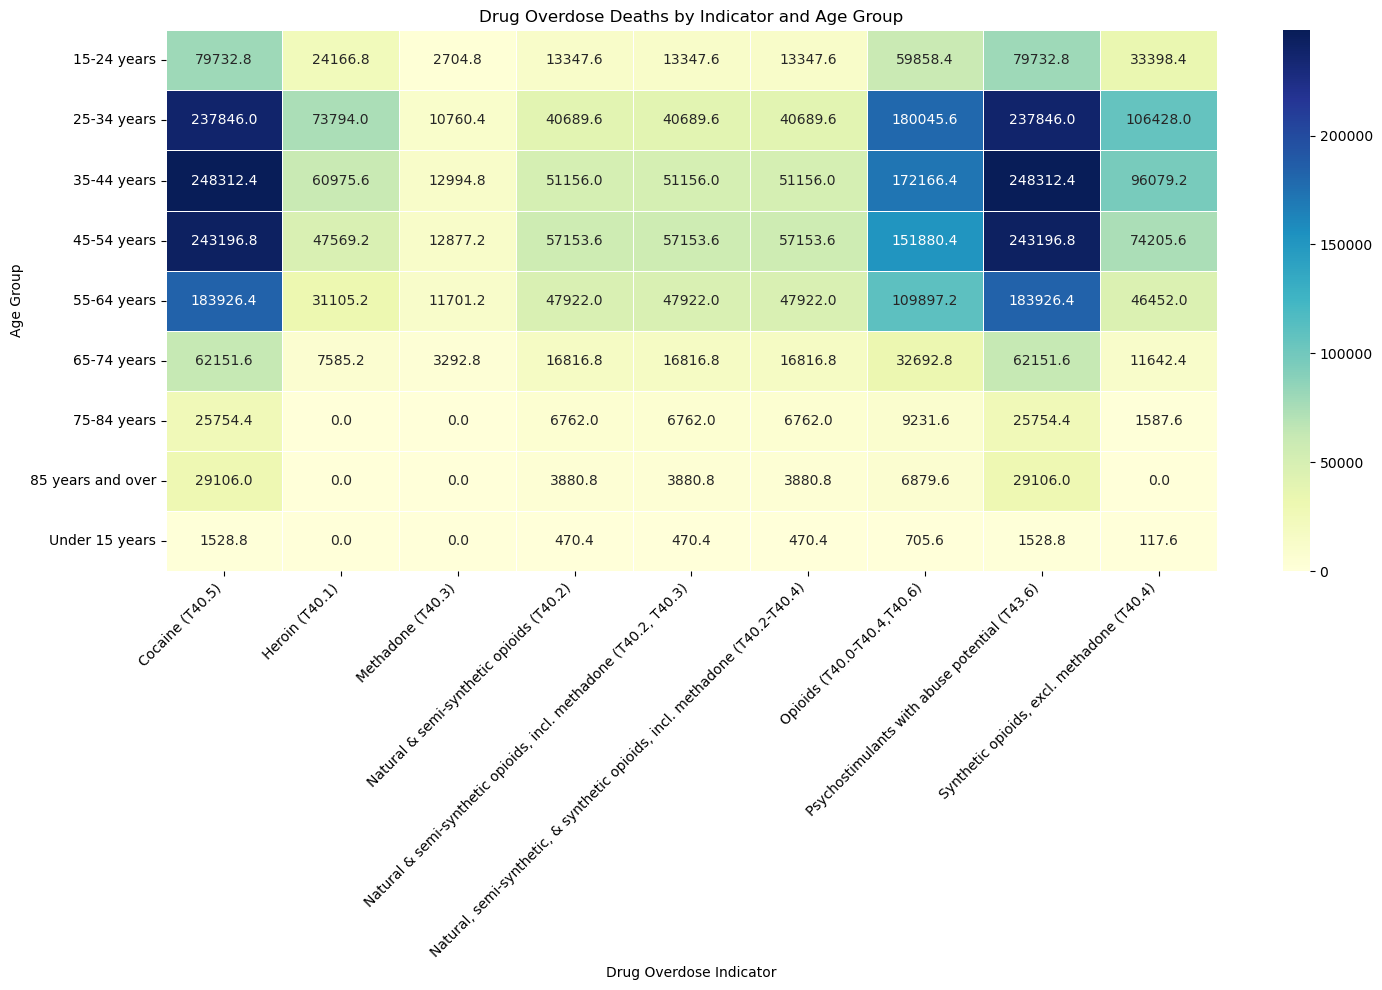

In [28]:
expanded_mapping = {v: k for k, values in mapping_dict.items() for v in (values if isinstance(values, list) else [values])}
vsrr_data['PANEL_NUM'] = vsrr_data['Indicator'].map(expanded_mapping)

# Filtering and renaming columns for the merge
vsrr_data_filtered_inclusive = vsrr_data[['Year', 'State', 'Indicator', 'PANEL_NUM','Data Value']]
drug_overdose_data_filtered = drug_overdose_data[['PANEL_NUM', 'YEAR', 'AGE', 'ESTIMATE','STUB_LABEL']].rename(columns={'YEAR': 'Year'})

# Combining the datasets
combined_data_inclusive = pd.merge(vsrr_data_filtered_inclusive, drug_overdose_data_filtered, on=['Year', 'PANEL_NUM'], how='left')

# Filtering the dataset to exclude rows where 'AGE' or 'ESTIMATE' is missing or not applicable
filtered_data_for_graphs = combined_data_inclusive.dropna(subset=['AGE', 'ESTIMATE'])
filtered_data_for_graphs = filtered_data_for_graphs[filtered_data_for_graphs['AGE'] != 'All ages']

# Grouping the data by 'Indicator' and 'AGE', then summing 'ESTIMATE' for total deaths per indicator per age group
indicator_age_group_data = filtered_data_for_graphs.groupby(['Indicator', 'AGE'])['ESTIMATE'].sum().reset_index()

# Creating a pivot table for better visualization in a heatmap
pivot_indicator_age = indicator_age_group_data.pivot("AGE", "Indicator", "ESTIMATE").fillna(0)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_indicator_age, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title('Drug Overdose Deaths by Indicator and Age Group')
plt.xlabel('Drug Overdose Indicator')
plt.ylabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\198701520.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_indicator_male = indicator_male_data.pivot("STUB_LABEL", "Indicator", "ESTIMATE").fillna(0)


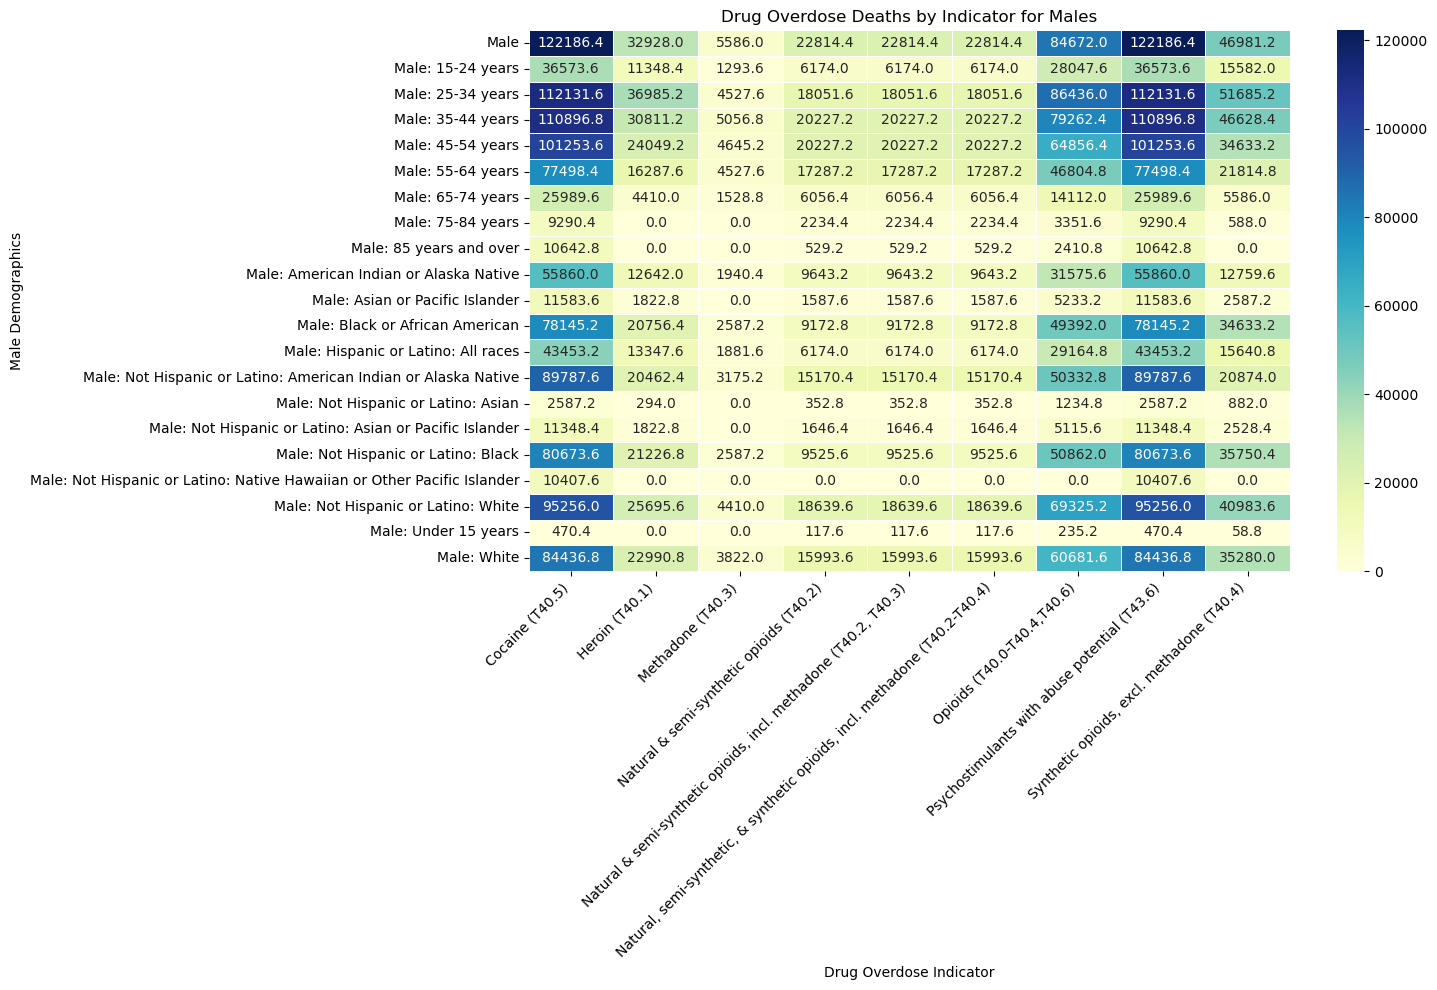

C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\198701520.py:48: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_indicator_male = indicator_male_data.pivot("STUB_LABEL", "Indicator", "ESTIMATE").fillna(0)


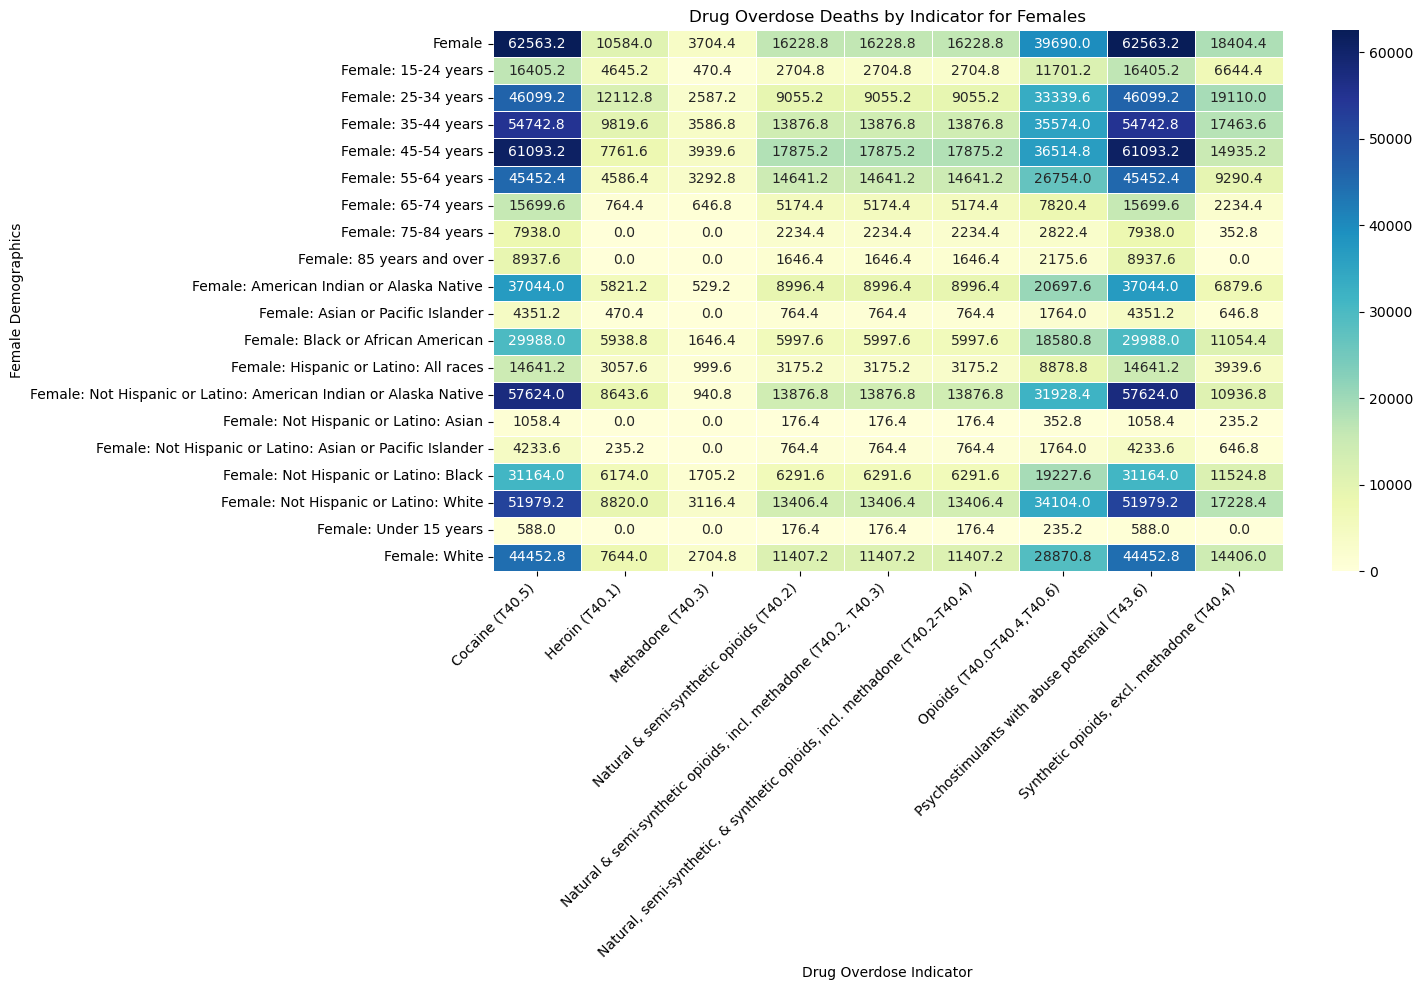

In [29]:
# Renaming the 'YEAR' column in the drug overdose data to match 'Year' in the VSRR data
drug_overdose_data_renamed = drug_overdose_data.rename(columns={'YEAR': 'Year'})

# Filtering the drug overdose data to include only male-related data
male_data = drug_overdose_data_renamed[drug_overdose_data_renamed['STUB_LABEL'].str.contains('Male')]

# Merging the male-specific data with the VSRR data
combined_male_data = pd.merge(vsrr_data_filtered_inclusive, male_data, on=['Year', 'PANEL_NUM'], how='left')

# Filtering out rows with missing or non-applicable 'ESTIMATE' values
filtered_male_data = combined_male_data.dropna(subset=['ESTIMATE'])

# Grouping the data by 'Indicator' and summing 'ESTIMATE' for total deaths per indicator for males
indicator_male_data = filtered_male_data.groupby(['Indicator', 'STUB_LABEL'])['ESTIMATE'].sum().reset_index()

# Creating a pivot table for better visualization in a heatmap
pivot_indicator_male = indicator_male_data.pivot("STUB_LABEL", "Indicator", "ESTIMATE").fillna(0)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_indicator_male, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title('Drug Overdose Deaths by Indicator for Males')
plt.xlabel('Drug Overdose Indicator')
plt.ylabel('Male Demographics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


# Renaming the 'YEAR' column in the drug overdose data to match 'Year' in the VSRR data
drug_overdose_data_renamed = drug_overdose_data.rename(columns={'YEAR': 'Year'})

# Filtering the drug overdose data to include only male-related data
male_data = drug_overdose_data_renamed[drug_overdose_data_renamed['STUB_LABEL'].str.contains('Female')]

# Merging the male-specific data with the VSRR data
combined_male_data = pd.merge(vsrr_data_filtered_inclusive, male_data, on=['Year', 'PANEL_NUM'], how='left')

# Filtering out rows with missing or non-applicable 'ESTIMATE' values
filtered_male_data = combined_male_data.dropna(subset=['ESTIMATE'])

# Grouping the data by 'Indicator' and summing 'ESTIMATE' for total deaths per indicator for males
indicator_male_data = filtered_male_data.groupby(['Indicator', 'STUB_LABEL'])['ESTIMATE'].sum().reset_index()

# Creating a pivot table for better visualization in a heatmap
pivot_indicator_male = indicator_male_data.pivot("STUB_LABEL", "Indicator", "ESTIMATE").fillna(0)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_indicator_male, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title('Drug Overdose Deaths by Indicator for Females')
plt.xlabel('Drug Overdose Indicator')
plt.ylabel('Female Demographics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


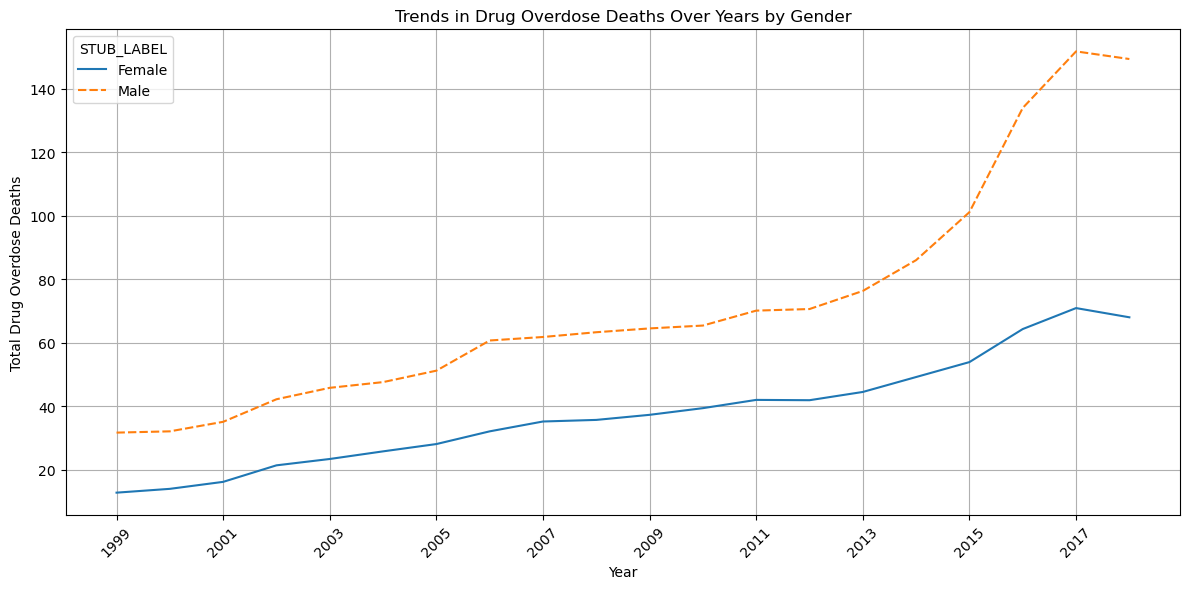

In [30]:
# Trends Over Time by Gender - Analyzing trends in drug overdose deaths for males and females over the years
gender_trends_data = drug_overdose_data[drug_overdose_data['STUB_LABEL'].isin(['Male', 'Female'])]

# Grouping by year and gender, then summing the estimates
gender_yearly_data = gender_trends_data.groupby(['YEAR', 'STUB_LABEL'])['ESTIMATE'].sum().unstack(fill_value=0)

# Plotting the data
# Let's assume your x-axis labels are years and you have them as integers or datetime objects
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_yearly_data)

# Here's where you set the x-ticks. If you have specific labels you want to use, put them in `new_labels`.
# For example, if you want to label every other year:
years = gender_yearly_data.index
every_other_year = years[::2]  # Select every other year if there are too many
new_labels = [str(year) for year in every_other_year]  # Convert to string if necessary

plt.xticks(ticks=every_other_year, labels=new_labels, rotation=45)  # Set new x-ticks and labels with a rotation

plt.title('Trends in Drug Overdose Deaths Over Years by Gender')
plt.xlabel('Year')
plt.ylabel('Total Drug Overdose Deaths')
plt.grid(True)
plt.tight_layout()  # This will make sure the layout fits everything

plt.show()


In [31]:
combined_data_inclusive.head()

Year State       Indicator  PANEL_NUM Data Value       AGE  ESTIMATE  \
0  2015    AK  Heroin (T40.1)        5.0        NaN  All ages       4.1   
1  2015    AK  Heroin (T40.1)        5.0        NaN  All ages       6.3   
2  2015    AK  Heroin (T40.1)        5.0        NaN  All ages       2.0   
3  2015    AK  Heroin (T40.1)        5.0        NaN  All ages       7.2   
4  2015    AK  Heroin (T40.1)        5.0        NaN  All ages       5.0   

                        STUB_LABEL  
0                      All persons  
1                             Male  
2                           Female  
3                      Male: White  
4  Male: Black or African American

        Year State       Indicator  PANEL_NUM Data Value       AGE  ESTIMATE  \
247320  2015    GA  Heroin (T40.1)        5.0        NaN  All ages       4.1   
247321  2015    GA  Heroin (T40.1)        5.0        NaN  All ages       6.3   
247322  2015    GA  Heroin (T40.1)        5.0        NaN  All ages       2.0   
247323  2015    GA  Heroin (T40.1)        5.0        NaN  All ages       7.2   
247324  2015    GA  Heroin (T40.1)        5.0        NaN  All ages       5.0   

                             STUB_LABEL  
247320                      All persons  
247321                             Male  
247322                           Female  
247323                      Male: White  
247324  Male: Black or African American  


C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\3732715085.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Data Value'] = pd.to_numeric(df_filtered['Data Value'], errors='coerce')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\3732715085.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


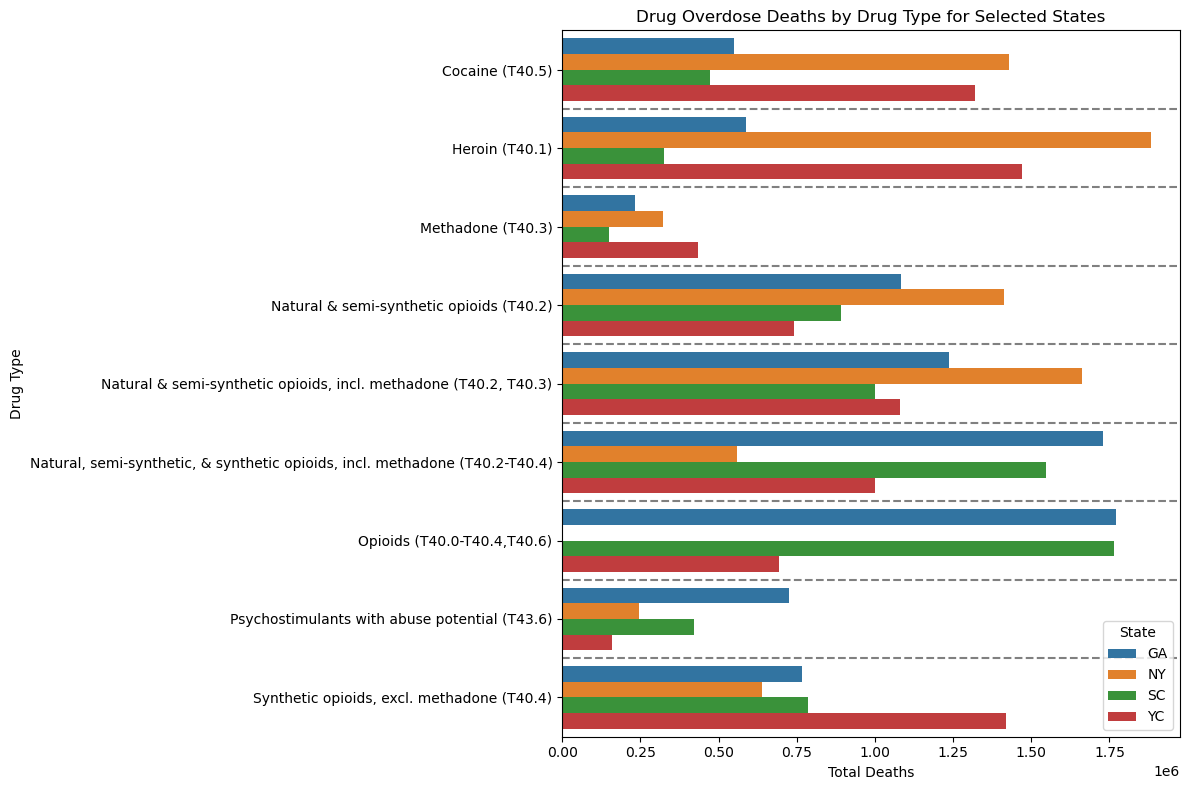

In [32]:
# To add a differentiator between drug to drug in the bar plot, we can add horizontal lines or spaces between the bars.
# We can also use different colors to differentiate the bars for each drug type.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'combined_data_inclusive' is already loaded and contains the required columns.

# Filter the DataFrame to include only the states of interest and exclude unwanted indicators
states_of_interest = ['NY', 'GA', 'YC', 'SC']  # Ensure these are the correct state abbreviations
indicators_to_filter = [
    'Number of Deaths',
    'Number of Drug Overdose Deaths',
    'Percent with drugs specified'
]

df_filtered = combined_data_inclusive[
    (combined_data_inclusive['State'].isin(states_of_interest)) &
    (~combined_data_inclusive['Indicator'].isin(indicators_to_filter))
]

# Make sure the 'Data Value' column is numeric
print(df_filtered.head())
df_filtered['Data Value'] = pd.to_numeric(df_filtered['Data Value'], errors='coerce')

# Pivot the data to get the total deaths by drug type for each state
pivot_df = df_filtered.pivot_table(
    index='Indicator',
    columns='State',
    values='Data Value',  # Ensure this is the correct column name for death counts
    aggfunc='sum'
).fillna(0)

# Resetting the index to make 'Indicator' a column again for melting
pivot_df.reset_index(inplace=True)

# Melting the DataFrame for seaborn compatibility
df_melted = pivot_df.melt(id_vars='Indicator', var_name='State', value_name='Total Deaths')

# Ensure 'Total Deaths' is a numeric column and 'State' is categorical
df_melted['Total Deaths'] = pd.to_numeric(df_melted['Total Deaths'], errors='coerce')
df_melted['State'] = df_melted['State'].astype('category')

# Creating the horizontal bar chart with different colors for each drug type

# Adding a vertical line between each drug type for clarity
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Total Deaths', 
    y='Indicator', 
    hue='State', 
    data=df_melted, 
    ci=None
)

# Adding a horizontal line between each drug type for clarity
yticks = barplot.get_yticks()  # Get the current y-tick locations
for i in range(len(yticks) - 1):
    middle = (yticks[i] + yticks[i + 1]) / 2
    plt.axhline(y=middle, color='grey', linestyle='--')

plt.title('Drug Overdose Deaths by Drug Type for Selected States')
plt.xlabel('Total Deaths')
plt.ylabel('Drug Type')
plt.legend(title='State')
plt.tight_layout()
plt.show()

C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\1802969046.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = grouped_data.pivot("STUB_LABEL", "Indicator", "ESTIMATE")


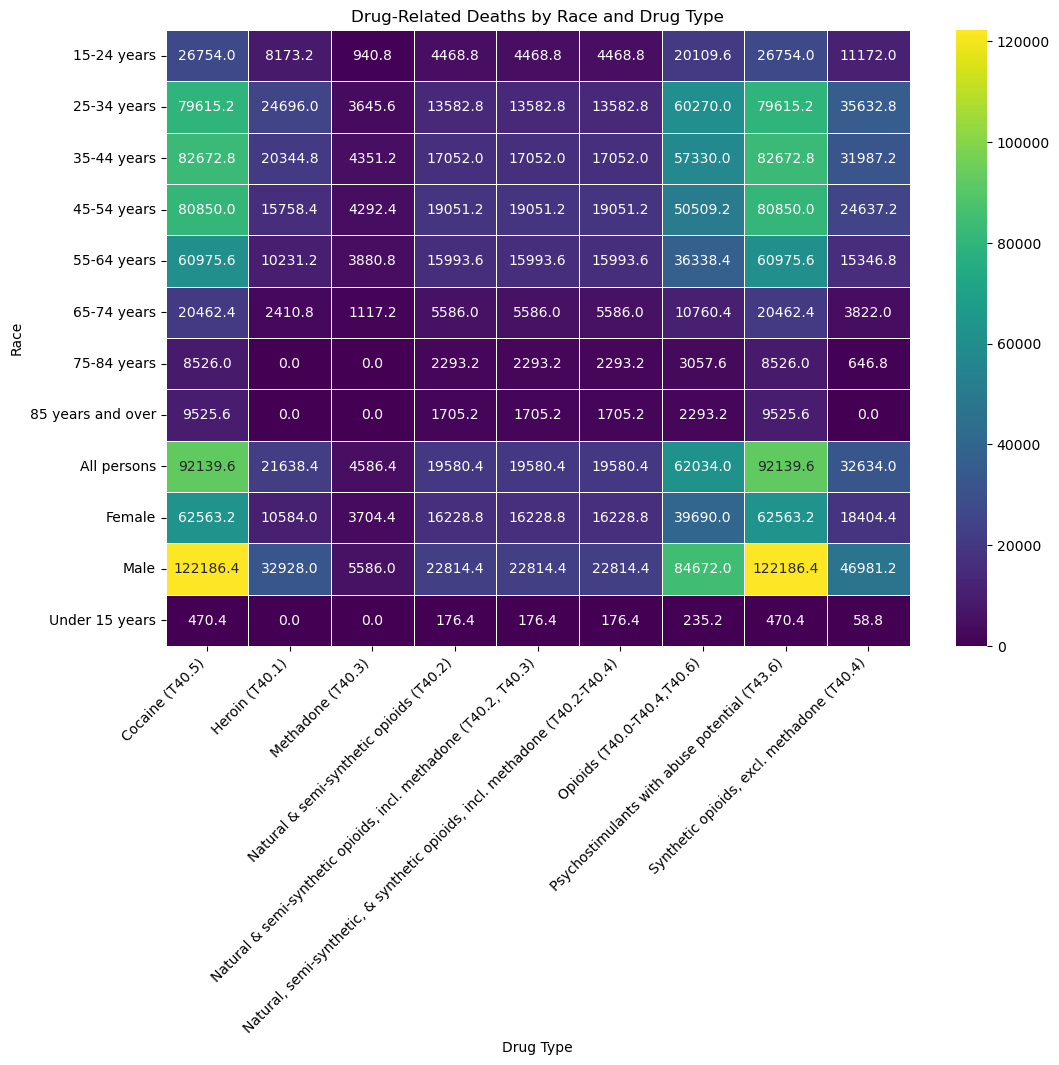

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the data for race-specific rows and excluding gender-specific rows
race_rows = combined_data_inclusive['STUB_LABEL'].str.contains('Male:|Female:', case=False, na=False)
race_data = combined_data_inclusive[~race_rows]

# Grouping data by race and drug type, summing up the estimates
grouped_data = race_data.groupby(['STUB_LABEL', 'Indicator']).agg({'ESTIMATE': 'sum'}).reset_index()

# Creating a pivot table for better visualization
pivot_data = grouped_data.pivot("STUB_LABEL", "Indicator", "ESTIMATE")

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".1f", linewidths=.5, cmap='viridis')
plt.title('Drug-Related Deaths by Race and Drug Type')
plt.ylabel('Race')
plt.xlabel('Drug Type')
plt.xticks(rotation=45, ha='right')
plt.show()


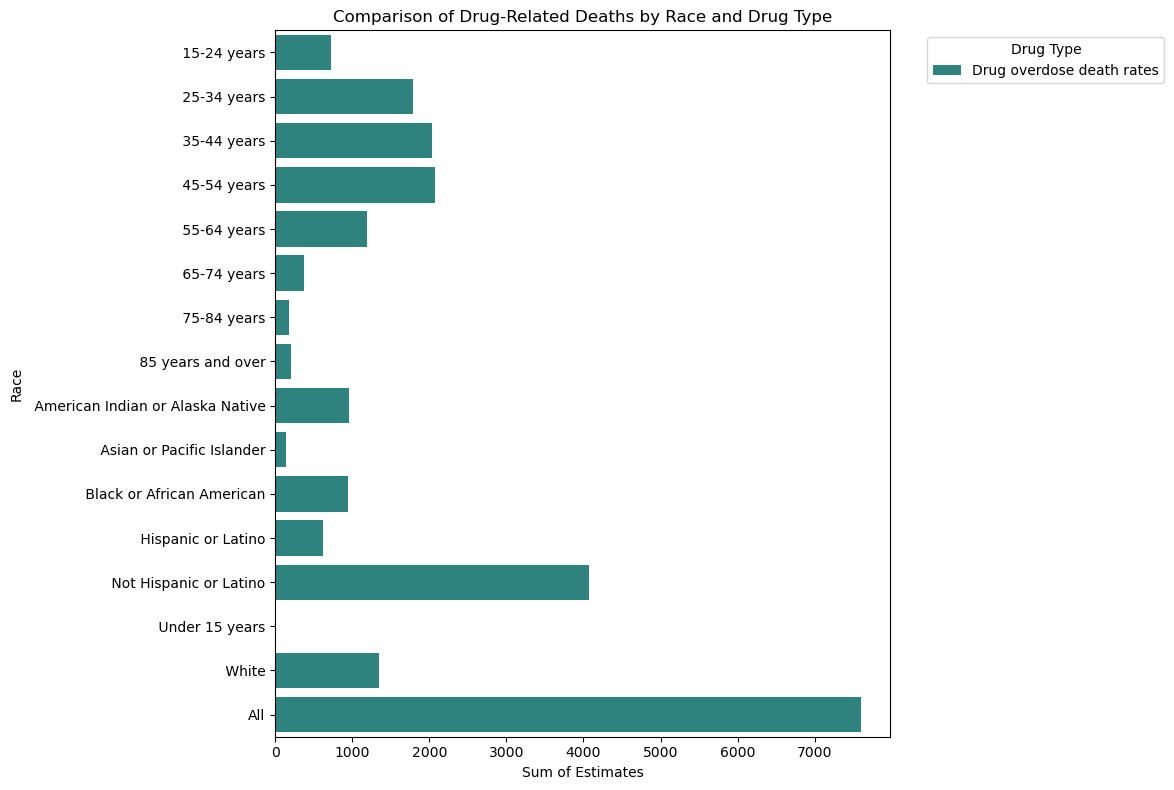

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset due to code execution state reset
file_path_new = 'Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20231112.csv'
data_new = pd.read_csv(file_path_new)

# Extracting the race information from 'STUB_LABEL' column
data_new['Race'] = data_new['STUB_LABEL'].apply(lambda x: x.split(':')[1] if ':' in x else 'All')

# Grouping data by race and drug type, summing up the estimates
grouped_new_data = data_new.groupby(['Race', 'INDICATOR']).agg({'ESTIMATE': 'sum'}).reset_index()

# Creating a bar plot for the feature-engineered data
plt.figure(figsize=(12, 8))
sns.barplot(x='ESTIMATE', y='Race', hue='INDICATOR', data=grouped_new_data, palette='viridis')
plt.title('Comparison of Drug-Related Deaths by Race and Drug Type')
plt.xlabel('Sum of Estimates')
plt.ylabel('Race')
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [35]:
# Re-loading the first provided dataset for checking unique drug types
file_path_combined = 'combined_data_inclusive.csv'
combined_data = pd.read_csv(file_path_combined)

# Identifying the unique drug types in the combined dataset
unique_drug_types_combined = combined_data['Indicator'].unique()
unique_drug_types_combined.sort()
unique_drug_types_combined


array(['Cocaine (T40.5)', 'Heroin (T40.1)', 'Methadone (T40.3)',
       'Natural & semi-synthetic opioids (T40.2)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Number of Deaths', 'Number of Drug Overdose Deaths',
       'Opioids (T40.0-T40.4,T40.6)', 'Percent with drugs specified',
       'Psychostimulants with abuse potential (T43.6)',
       'Synthetic opioids, excl. methadone (T40.4)'], dtype=object)

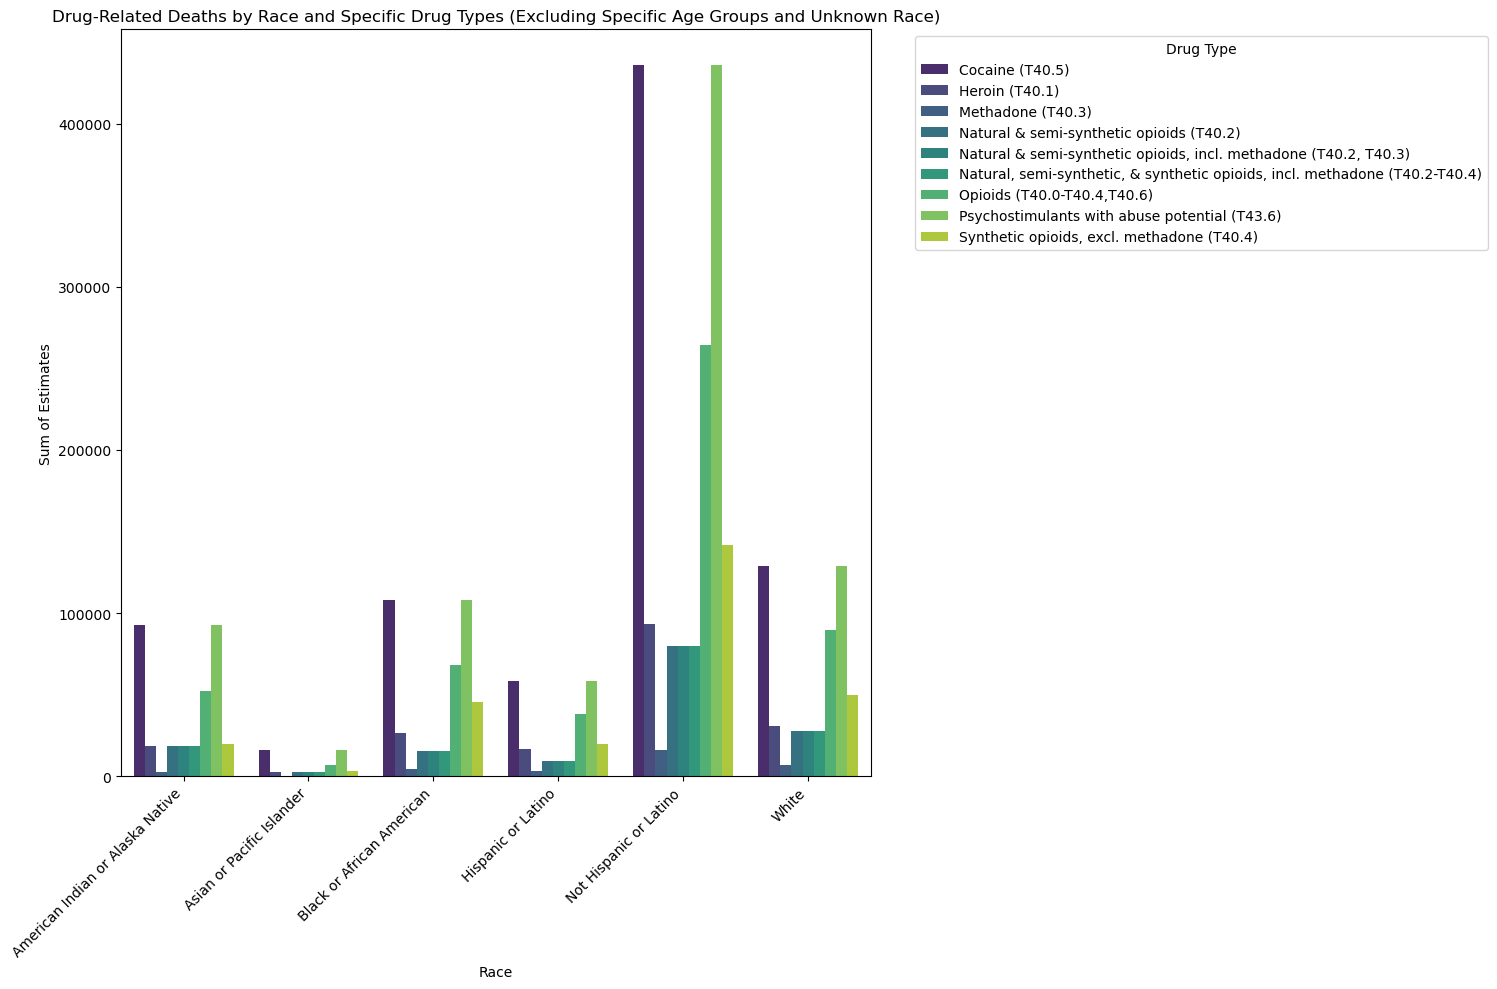

In [36]:
# Filtering out rows that do not represent specific drug types
specific_drug_types = [
    'Cocaine (T40.5)', 'Heroin (T40.1)', 'Methadone (T40.3)',
    'Natural & semi-synthetic opioids (T40.2)',
    'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
    'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
    'Opioids (T40.0-T40.4,T40.6)',
    'Psychostimulants with abuse potential (T43.6)',
    'Synthetic opioids, excl. methadone (T40.4)'
]
# Reload the combined dataset and handle any missing values in 'STUB_LABEL'
combined_data = pd.read_csv(file_path_combined)

# Handling missing or non-string values in 'STUB_LABEL'
combined_data['STUB_LABEL'] = combined_data['STUB_LABEL'].fillna('Unknown')
combined_data['STUB_LABEL'] = combined_data['STUB_LABEL'].astype(str)

# Extracting the second part of the 'STUB_LABEL' for race information
combined_data['Race'] = combined_data['STUB_LABEL'].apply(lambda x: x.split(':')[1].strip() if ':' in x else 'Unknown')


# Creating a bar plot for the specific drug types
# Filtering out the age group data from the combined dataset
no_age_group_data = combined_data[~combined_data['STUB_LABEL'].str.contains('age', case=False)]

# Filtering out rows that represent specific drug types
filtered_no_age_data = no_age_group_data[no_age_group_data['Indicator'].isin(specific_drug_types)]

# Grouping data by race and specific drug type, summing up the estimates
grouped_no_age_data = filtered_no_age_data.groupby(['Race', 'Indicator']).agg({'ESTIMATE': 'sum'}).reset_index()

age_groups_to_exclude = [
    'Under 15 years', '15-24 years', '25-34 years', '35-44 years', 
    '45-54 years', '55-64 years', '65-74 years', '75-84 years', 
    '85 years and over'
]
# Creating a bar plot for the specific drug types without age groups
age_groups_to_exclude_regex = '|'.join(age_groups_to_exclude)

filtered_data_corrected = combined_data[
    ~combined_data['STUB_LABEL'].str.contains(age_groups_to_exclude_regex, case=False, na=False) &
    (combined_data['Race'] != 'Unknown')
]

# Filtering out rows that represent specific drug types
filtered_data_corrected = filtered_data_corrected[filtered_data_corrected['Indicator'].isin(specific_drug_types)]

# Grouping data by race and specific drug type, summing up the estimates
grouped_data_corrected = filtered_data_corrected.groupby(['Race', 'Indicator']).agg({'ESTIMATE': 'sum'}).reset_index()

# Creating a bar plot for the specific drug types without specific age groups and 'Unknown' race
# Rotating the bar plot with rotated x-axis labels
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(y='ESTIMATE', x='Race', hue='Indicator', data=grouped_data_corrected, palette='viridis')
plt.title('Drug-Related Deaths by Race and Specific Drug Types (Excluding Specific Age Groups and Unknown Race)')
plt.ylabel('Sum of Estimates')
plt.xlabel('Race')
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


In [37]:
combined_data.head()

Year State       Indicator  PANEL_NUM Data Value  \
0  2015    AK  Heroin (T40.1)        5.0        NaN   
1  2015    AK  Heroin (T40.1)        5.0        NaN   
2  2015    AK  Heroin (T40.1)        5.0        NaN   
3  2015    AK  Heroin (T40.1)        5.0        NaN   
4  2015    AK  Heroin (T40.1)        5.0        NaN   

                        STUB_LABEL       AGE  ESTIMATE  \
0                      All persons  All ages       4.1   
1                             Male  All ages       6.3   
2                           Female  All ages       2.0   
3                      Male: White  All ages       7.2   
4  Male: Black or African American  All ages       5.0   

                        Race  
0                    Unknown  
1                    Unknown  
2                    Unknown  
3                      White  
4  Black or African American

C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\1073540479.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocaine_data['Race'] = cocaine_data['STUB_LABEL'].str.extract('(' + '|'.join(races) + ')')


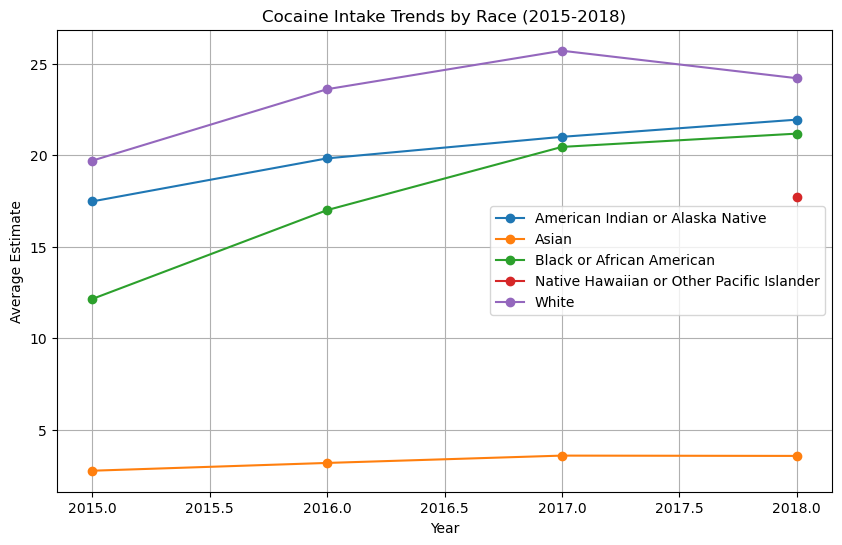

In [38]:
import matplotlib.pyplot as plt
# The data contains various indicators, but we need to filter for cocaine-related data
# Also, we need to filter the data to include only the relevant races for the analysis

# Relevant indicators for cocaine (assuming based on typical naming conventions)
cocaine_indicators = ['Cocaine (T40.5)', 'Cocaine']

# Relevant races
races = ['White', 'Black or African American', 'Asian', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander']

# Filtering the data
cocaine_data = combined_data[combined_data['Indicator'].isin(cocaine_indicators) & combined_data['STUB_LABEL'].str.contains('|'.join(races))]

# Checking the structure of the filtered data
cocaine_data.head()
# The data includes gender-specific information, but we might need to aggregate it for a general race-wise analysis
# We'll create a pivot table to aggregate the estimates by race and year

# Extracting race from the 'STUB_LABEL' column
cocaine_data['Race'] = cocaine_data['STUB_LABEL'].str.extract('(' + '|'.join(races) + ')')

# Creating a pivot table
cocaine_pivot = cocaine_data.pivot_table(index='Year', columns='Race', values='ESTIMATE', aggfunc='mean')

# Display the pivot table
cocaine_pivot.head()

# Creating a line graph to show the trends in cocaine intake among various races over the years

plt.figure(figsize=(10, 6))
for race in cocaine_pivot.columns:
    plt.plot(cocaine_pivot.index, cocaine_pivot[race], label=race, marker='o')

plt.title('Cocaine Intake Trends by Race (2015-2018)')
plt.xlabel('Year')
plt.ylabel('Average Estimate')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# First, let's identify all the unique drug indicators in the dataset
unique_drugs = data['Indicator'].unique()
unique_drugs.sort()
unique_drugs


array(['Cocaine (T40.5)', 'Heroin (T40.1)', 'Methadone (T40.3)',
       'Natural & semi-synthetic opioids (T40.2)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Number of Deaths', 'Number of Drug Overdose Deaths',
       'Opioids (T40.0-T40.4,T40.6)', 'Percent with drugs specified',
       'Psychostimulants with abuse potential (T43.6)',
       'Synthetic opioids, excl. methadone (T40.4)'], dtype=object)

C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\2040787391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_drug_data['Race'] = corrected_drug_data['STUB_LABEL'].str.extract('(' + '|'.join(races) + ')')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\2040787391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_drug_data['Race'] = corrected_drug_data['STUB_LABEL'].str.extract('(' + '|'.join(races) + ')')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\2040787391.py:6: 

Pivot table for Cocaine (T40.5):
Race  American Indian or Alaska Native     Asian  Black or African American  \
Year                                                                          
2015                           17.4750  2.775000                     12.150   
2016                           19.8250  3.200000                     17.000   
2017                           21.0000  3.600000                     20.450   
2018                           21.9375  3.583333                     21.175   

Race  Native Hawaiian or Other Pacific Islander  White  
Year                                                    
2015                                        NaN   19.7  
2016                                        NaN   23.6  
2017                                        NaN   25.7  
2018                                       17.7   24.2   

Pivot table for Heroin (T40.1):
Race  American Indian or Alaska Native  Asian  Black or African American  \
Year                                    

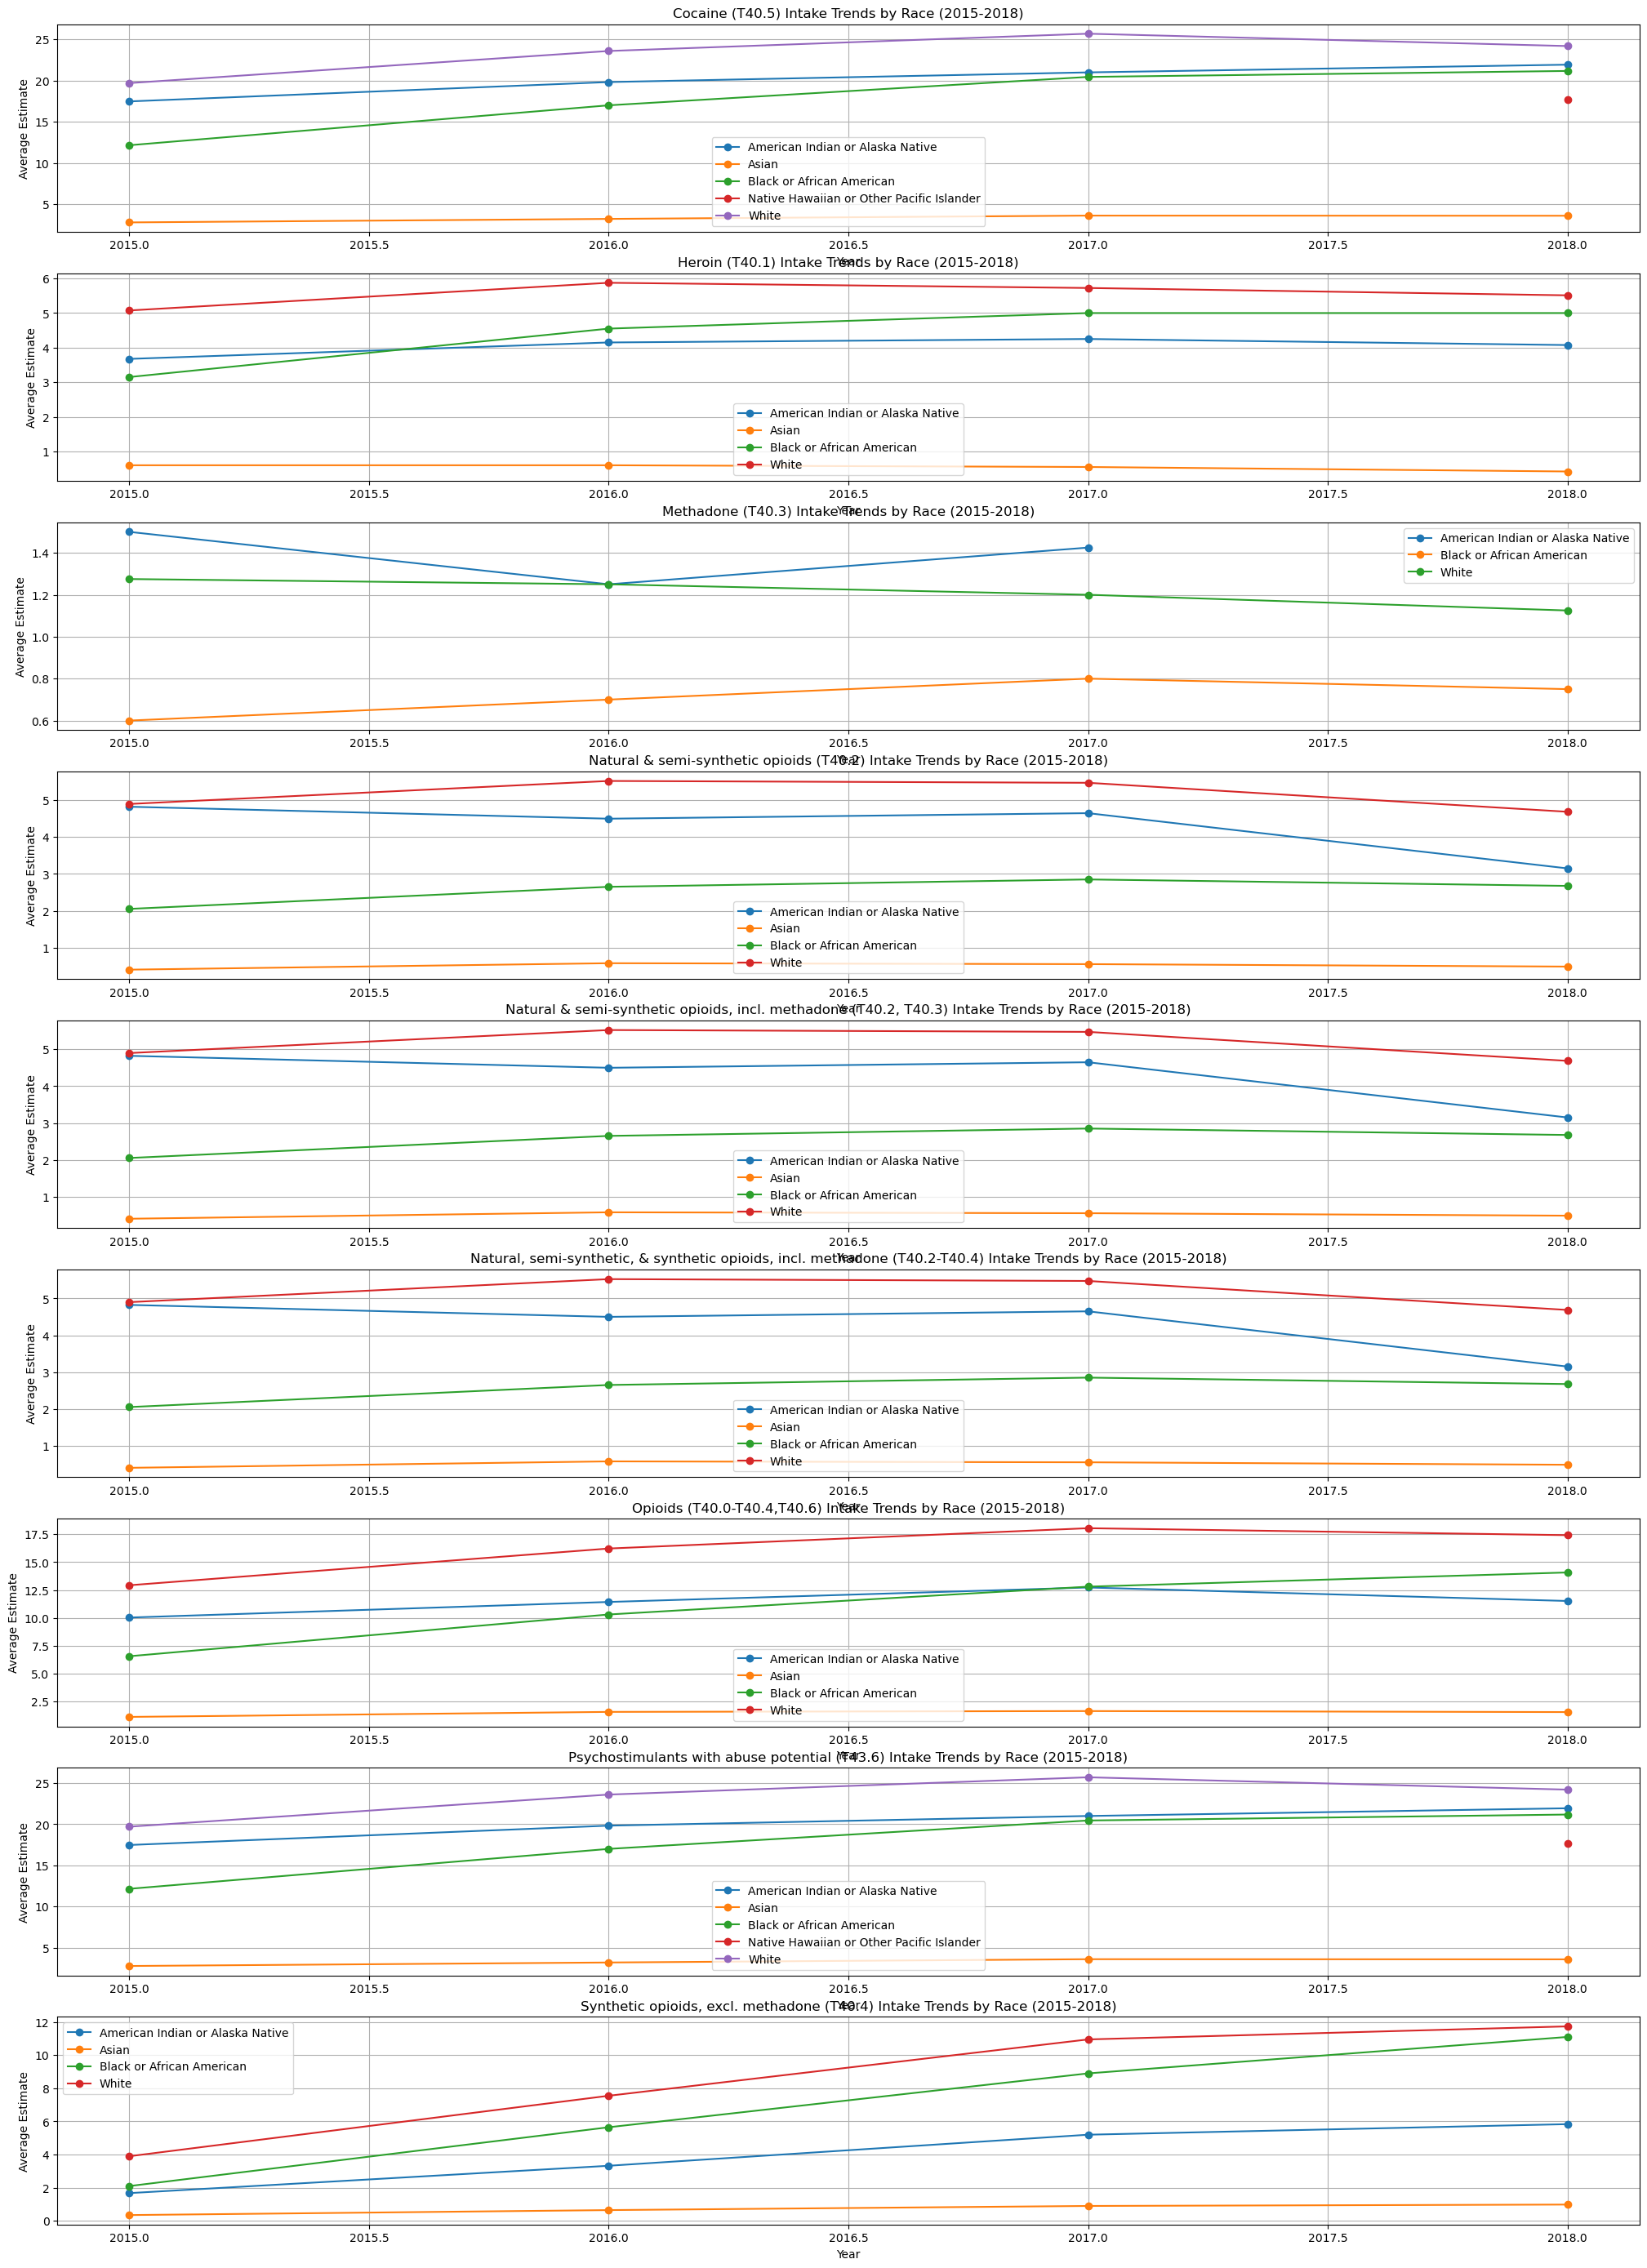

In [42]:

corrected_drug_pivot_tables = {}

for drug in unique_drugs:
    if 'T40' in drug or 'T43' in drug:  # Filtering out non-specific drug indicators
        corrected_drug_data = combined_data[combined_data['Indicator'] == drug]
        corrected_drug_data['Race'] = corrected_drug_data['STUB_LABEL'].str.extract('(' + '|'.join(races) + ')')
        corrected_drug_pivot = corrected_drug_data.pivot_table(index='Year', columns='Race', values='ESTIMATE', aggfunc='mean')
        corrected_drug_pivot_tables[drug] = corrected_drug_pivot

# Display the pivot tables for the first few drugs as an example
for drug, pivot_table in list(corrected_drug_pivot_tables.items())[:3]:
    print(f"Pivot table for {drug}:")
    print(pivot_table.head(), "\n")  # Display the first few rows of each pivot table

plt.figure(figsize=(25, 35))

# Plotting each drug in a separate subplot
for i, (drug, pivot_table) in enumerate(corrected_drug_pivot_tables.items(), 1):
    plt.subplot(len(corrected_drug_pivot_tables), 1, i)
    for race in pivot_table.columns:
        plt.plot(pivot_table.index, pivot_table[race], label=race, marker='o')

    plt.title(f'{drug} Intake Trends by Race (2015-2018)')
    plt.xlabel('Year')
    plt.ylabel('Average Estimate')
    plt.legend()
    plt.grid(True)

plt.show()


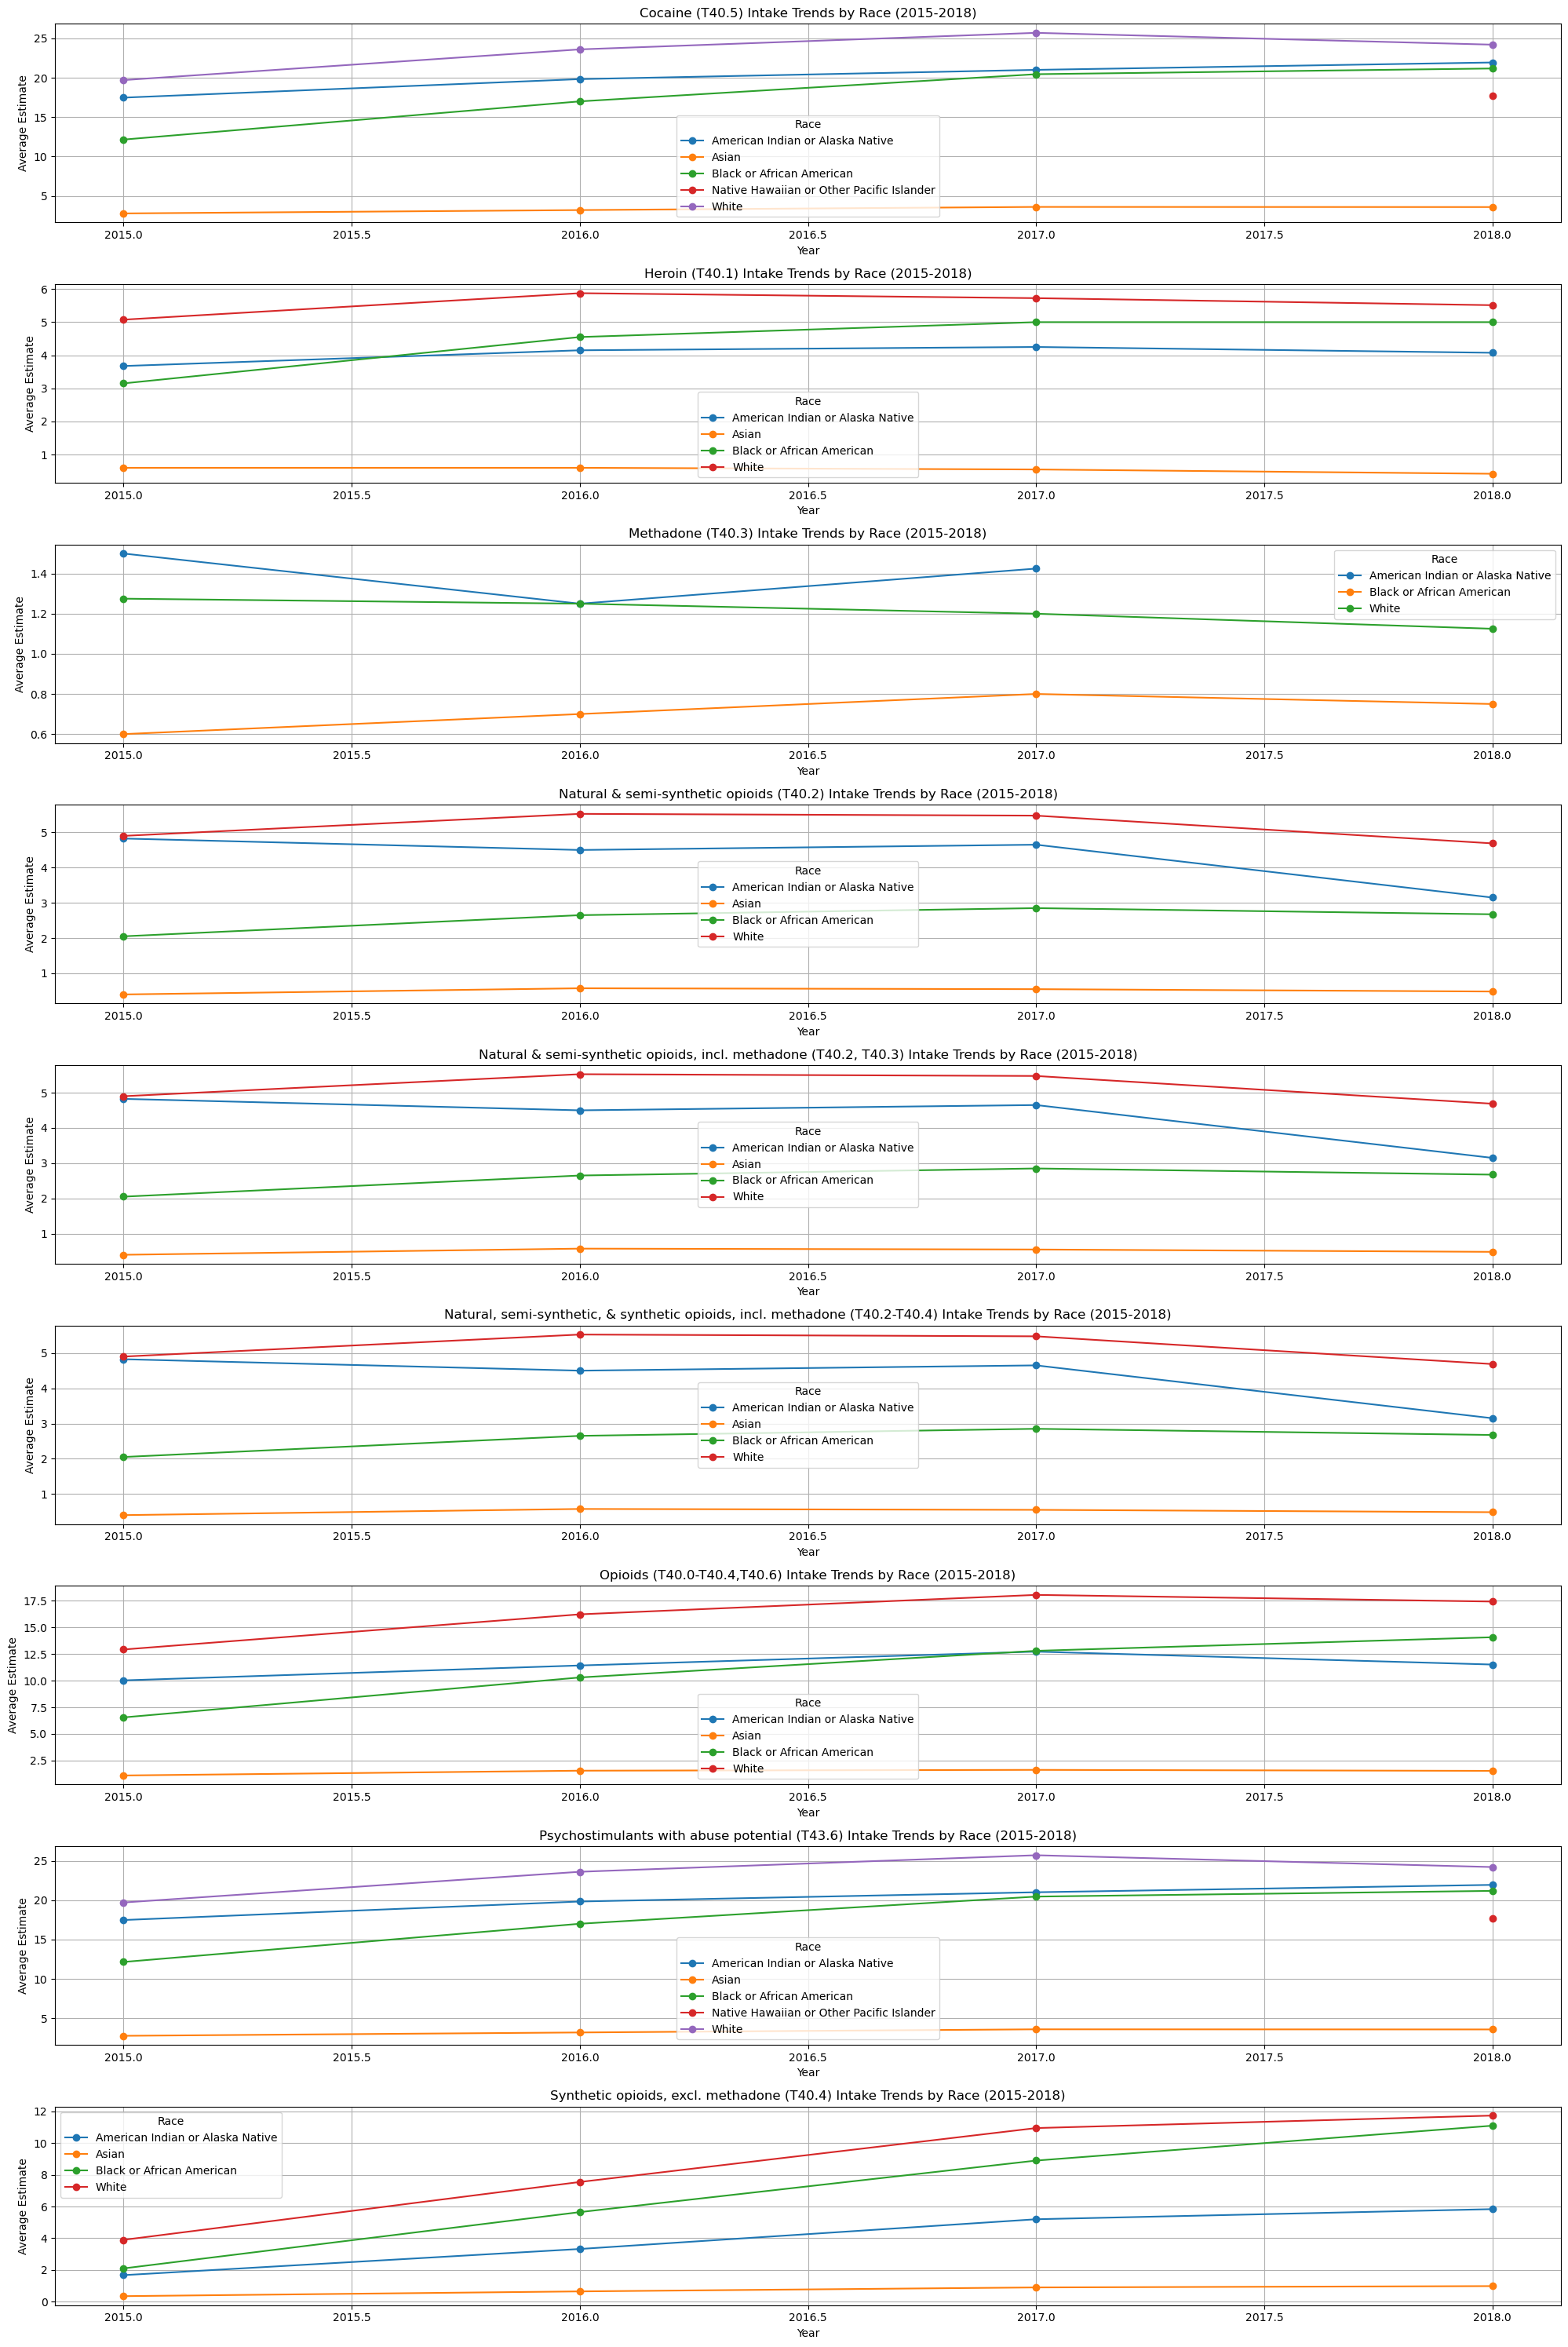

In [43]:
# Creating clearer and more concise line graphs for each drug to show the trends in drug intake among various races over the years

# Setting up a larger figure size for clarity
plt.figure(figsize=(20, 30))

# Plotting each drug in a separate subplot for better visibility
for i, (drug, pivot_table) in enumerate(corrected_drug_pivot_tables.items(), 1):
    ax = plt.subplot(len(corrected_drug_pivot_tables), 1, i)
    pivot_table.plot(ax=ax, kind='line', marker='o', title=f'{drug} Intake Trends by Race (2015-2018)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Estimate')
    ax.grid(True)
    ax.legend(title='Race')

plt.tight_layout()
plt.show()


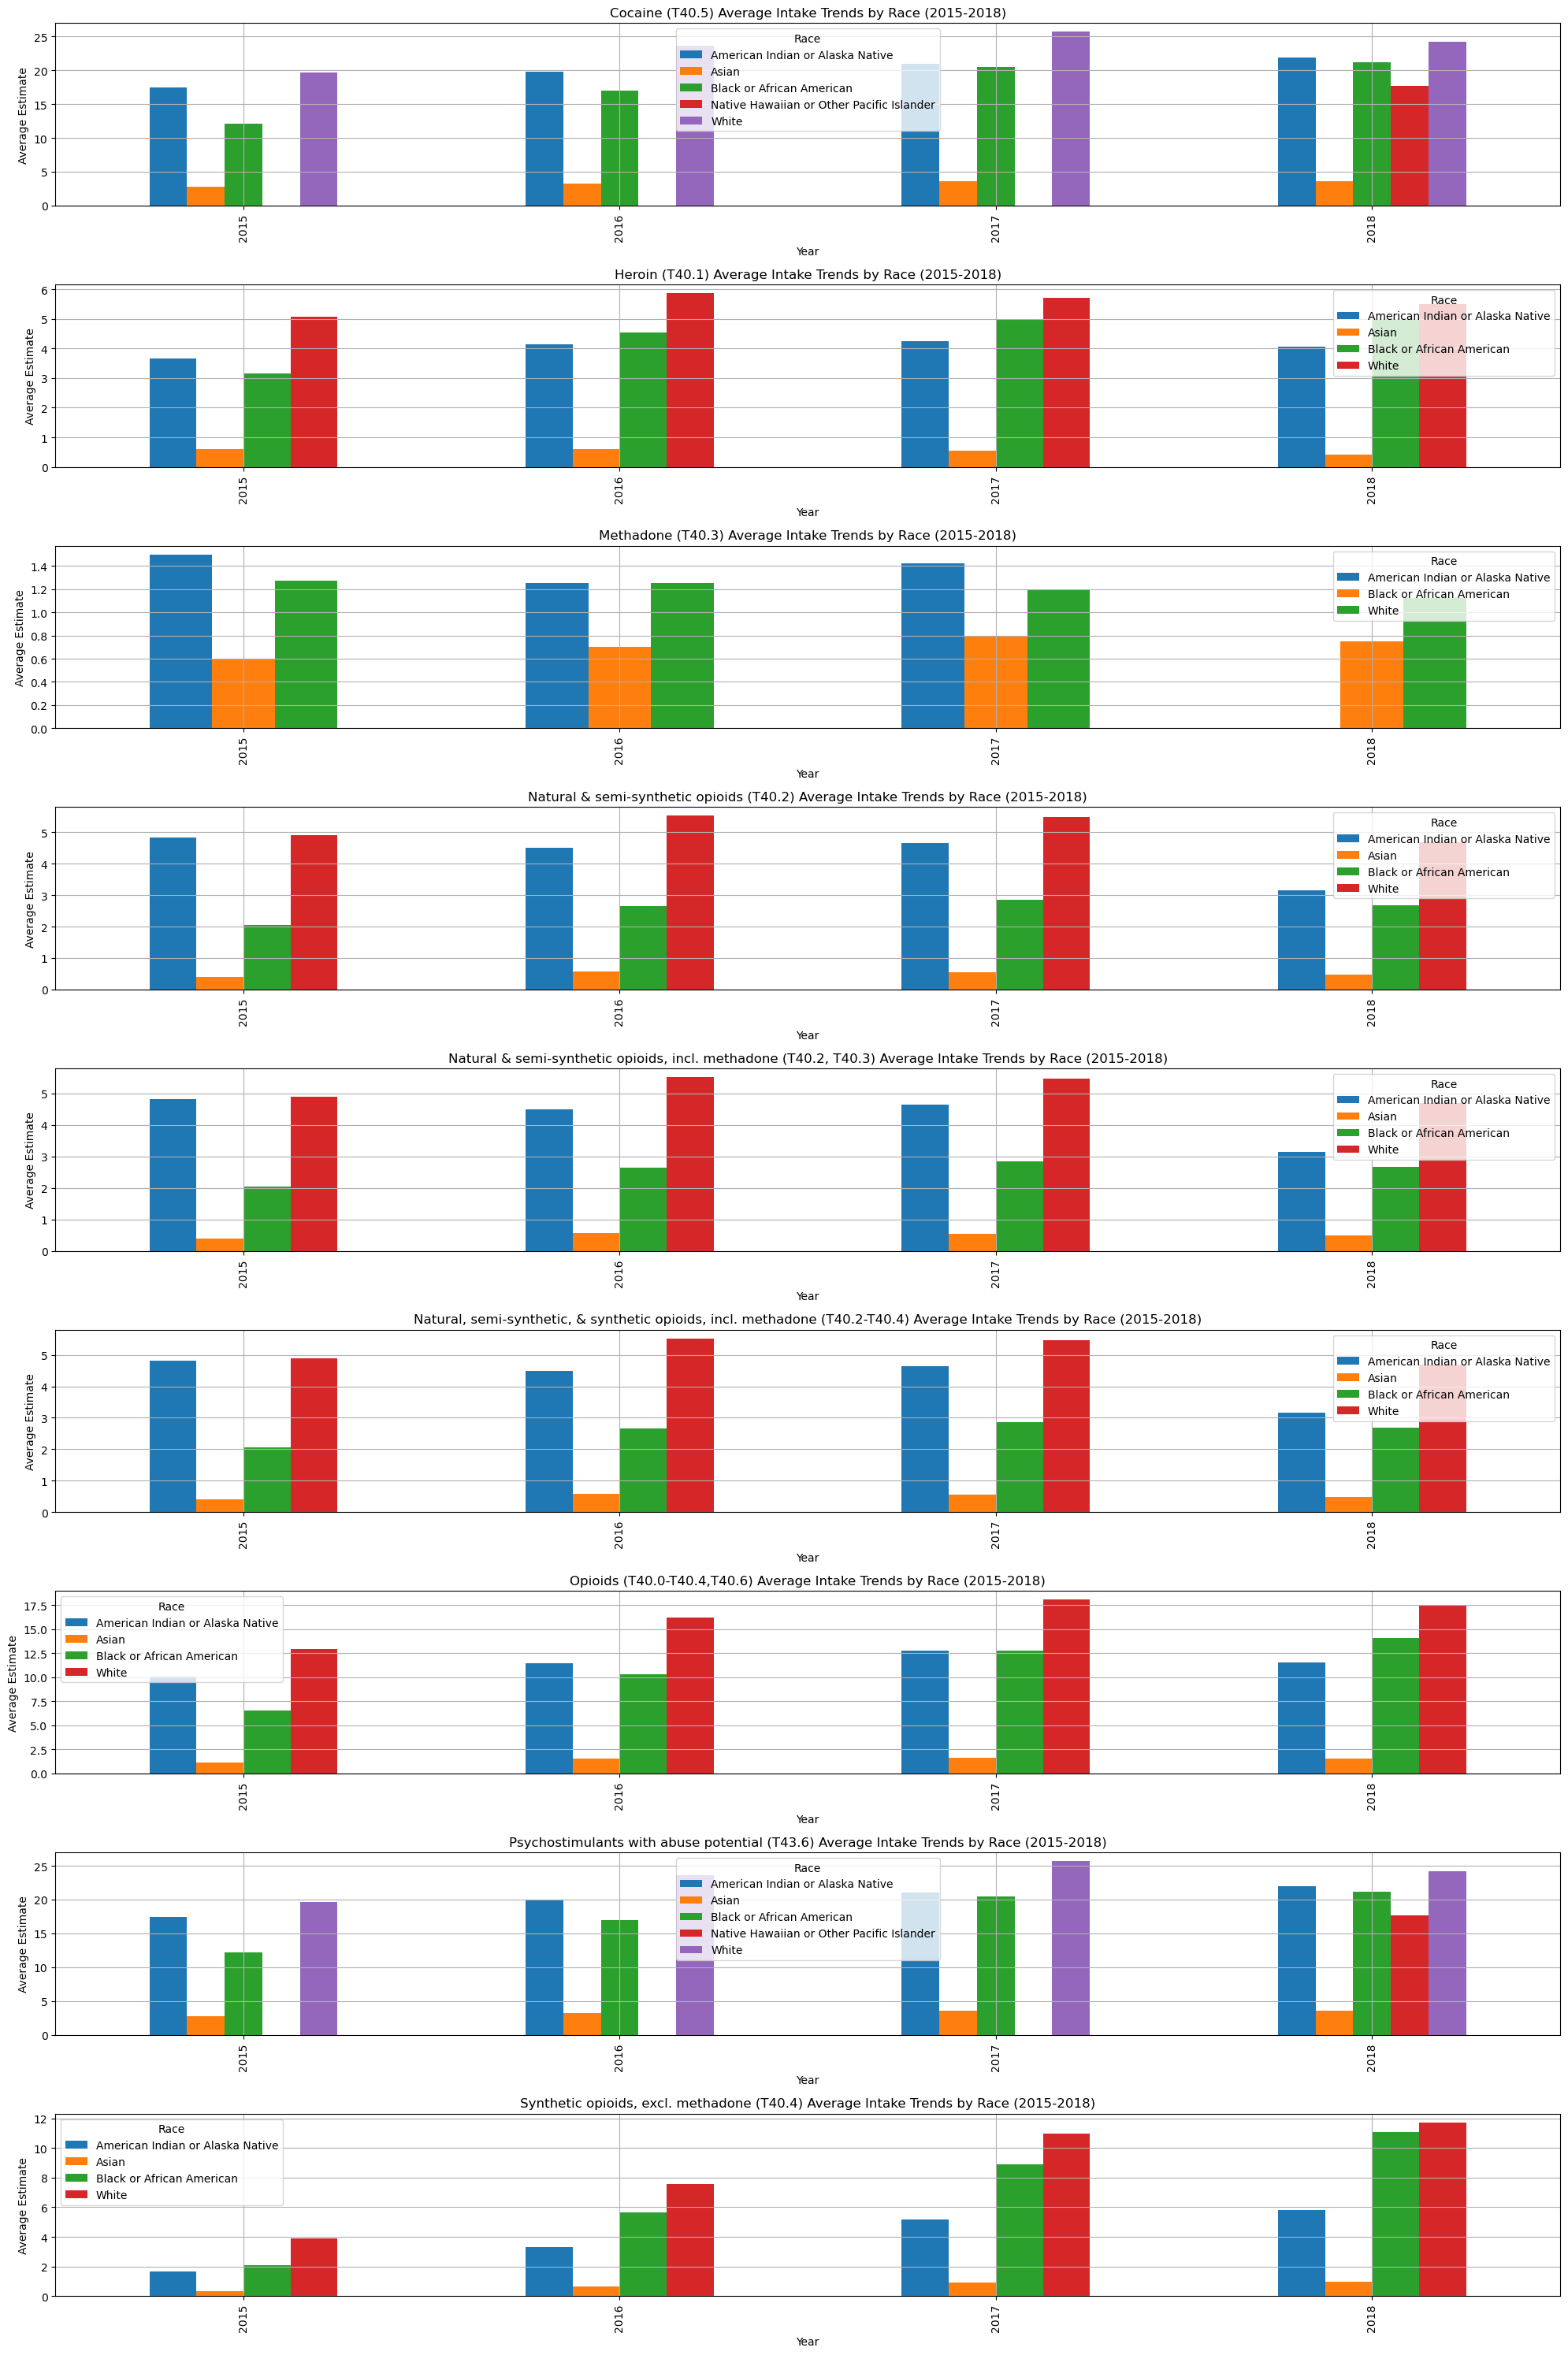

In [44]:
# Creating bar graphs for each drug to show the average drug intake among various races over the years

# Setting up a larger figure size for clarity
plt.figure(figsize=(20, 30))

# Plotting each drug in a separate subplot for better visibility using bar graphs
for i, (drug, pivot_table) in enumerate(corrected_drug_pivot_tables.items(), 1):
    ax = plt.subplot(len(corrected_drug_pivot_tables), 1, i)
    pivot_table.plot(ax=ax, kind='bar', title=f'{drug} Average Intake Trends by Race (2015-2018)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Estimate')
    ax.grid(True)
    ax.legend(title='Race')

plt.tight_layout()
plt.show()


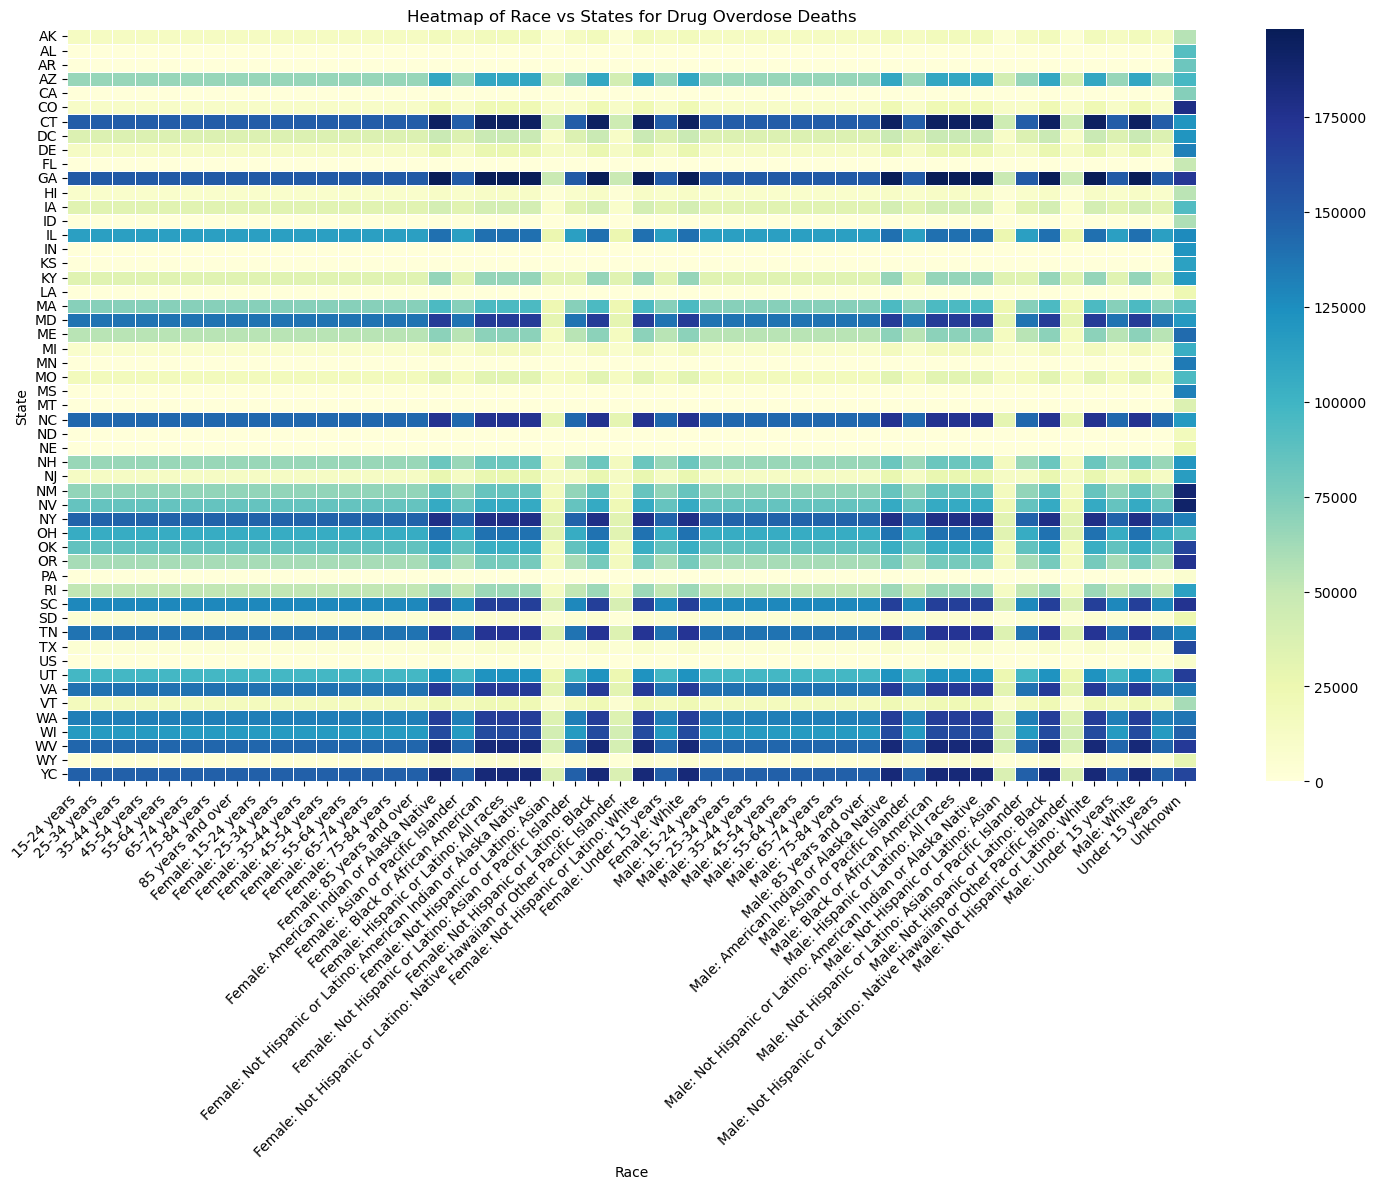

In [45]:
combined_data_final = combined_data

combined_data['Data Value'] = pd.to_numeric(combined_data['Data Value'], errors='coerce')

labels_to_remove = ['Female', 'Male', 'All persons']
combined_data_filtered = combined_data[~combined_data['STUB_LABEL'].isin(labels_to_remove)]

# Creating a pivot table
pivot_race_state = combined_data_filtered.pivot_table(index='State', columns='STUB_LABEL', values='Data Value', aggfunc='sum', fill_value=0)

# Assuming 'Race' and 'State' are columns in your DataFrame and 'Data Value' is the metric you want to analyze
# pivot_race_state = combined_data.pivot_table(index='State', columns='STUB_LABEL', values='Data Value', aggfunc='sum', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot_race_state, annot=False, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Race vs States for Drug Overdose Deaths')
plt.xlabel('Race')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


In [46]:
states_with_high_corr=['AZ','CT','GA','IL','MA','MD','ME','NC','NH','NM','NV','NY','OH','OK','OR','SC','TN','UT','VA','WA','WI','WV','YC']

In [47]:
combined_data_final.shape

(1213056, 9)

In [48]:
# Feature engineering based on 'STUB_LABEL'
# We can extract features like gender, age group, race/ethnicity from the 'STUB_LABEL' column

def extract_gender(stub_label):
    if 'Female' in stub_label:
        return 'Female'
    elif 'Male' in stub_label:
        return 'Male'
    else:
        return 'Unknown'

def extract_age_group(stub_label):
    age_groups = ['Under 15 years', '15-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85 years and over']
    for age_group in age_groups:
        if age_group in stub_label:
            return age_group
    return 'Unknown'

def extract_race_ethnicity(stub_label):
    races_ethnicities = ['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Black or African American', 'Hispanic or Latino', 'White', 'Native Hawaiian or Other Pacific Islander']
    for race_ethnicity in races_ethnicities:
        if race_ethnicity in stub_label:
            return race_ethnicity
    return 'Unknown'

# Applying the feature engineering
combined_data_final['Gender'] = combined_data_final['STUB_LABEL'].apply(extract_gender)
combined_data_final['Age_Group'] = combined_data_final['STUB_LABEL'].apply(extract_age_group)
combined_data_final['Race_Ethnicity'] = combined_data_final['STUB_LABEL'].apply(extract_race_ethnicity)

# Displaying the first few rows of the updated dataset
combined_data_final.head()


Year State       Indicator  PANEL_NUM  Data Value  \
0  2015    AK  Heroin (T40.1)        5.0         NaN   
1  2015    AK  Heroin (T40.1)        5.0         NaN   
2  2015    AK  Heroin (T40.1)        5.0         NaN   
3  2015    AK  Heroin (T40.1)        5.0         NaN   
4  2015    AK  Heroin (T40.1)        5.0         NaN   

                        STUB_LABEL       AGE  ESTIMATE  \
0                      All persons  All ages       4.1   
1                             Male  All ages       6.3   
2                           Female  All ages       2.0   
3                      Male: White  All ages       7.2   
4  Male: Black or African American  All ages       5.0   

                        Race   Gender Age_Group             Race_Ethnicity  
0                    Unknown  Unknown   Unknown                    Unknown  
1                    Unknown     Male   Unknown                    Unknown  
2                    Unknown   Female   Unknown                    Unknown  
3                      White     Male   Unknown                      White  
4  Black or African American     Male   Unknown  Black or African American

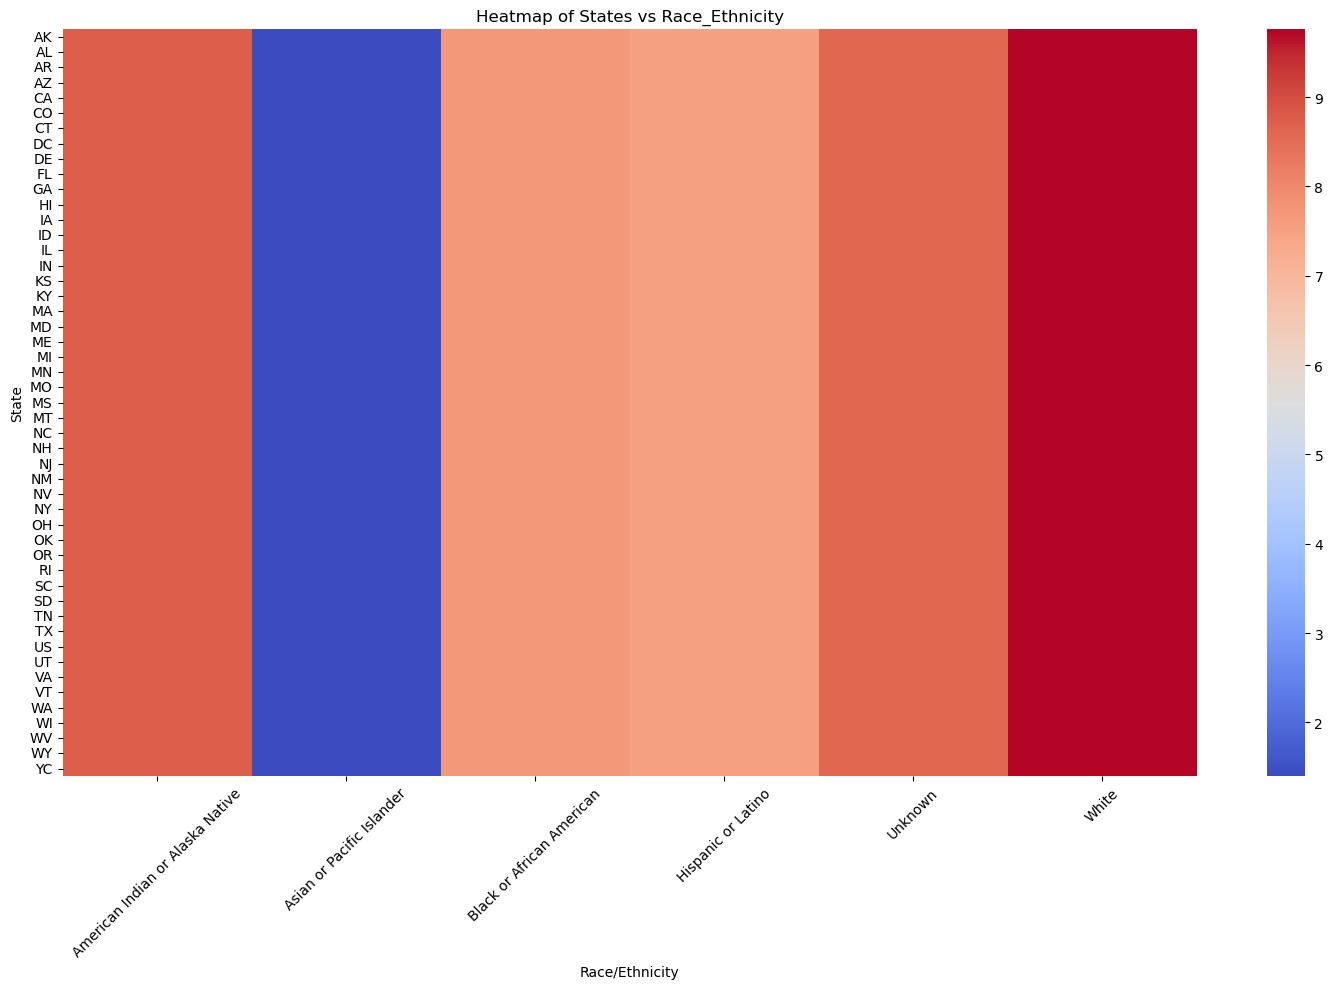

In [49]:
# Creating a heatmap for Race vs State

# We will use the newly created 'Race_Ethnicity' column for this heatmap
heatmap_data_race_state = combined_data_final.pivot_table(values='ESTIMATE', index='State', columns='Race_Ethnicity', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data_race_state, annot=False, cmap='coolwarm')
plt.title('Heatmap of States vs Race_Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# # Save the heatmap
# heatmap_file_path_race_state = '/mnt/data/states_vs_race_ethnicity_heatmap.png'
# plt.savefig(heatmap_file_path_race_state)
# plt.show()

# heatmap_file_path_race_state


C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\1235889703.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  georgia_data = filtered_data_corrected[combined_data_filtered['State'] == 'GA']
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


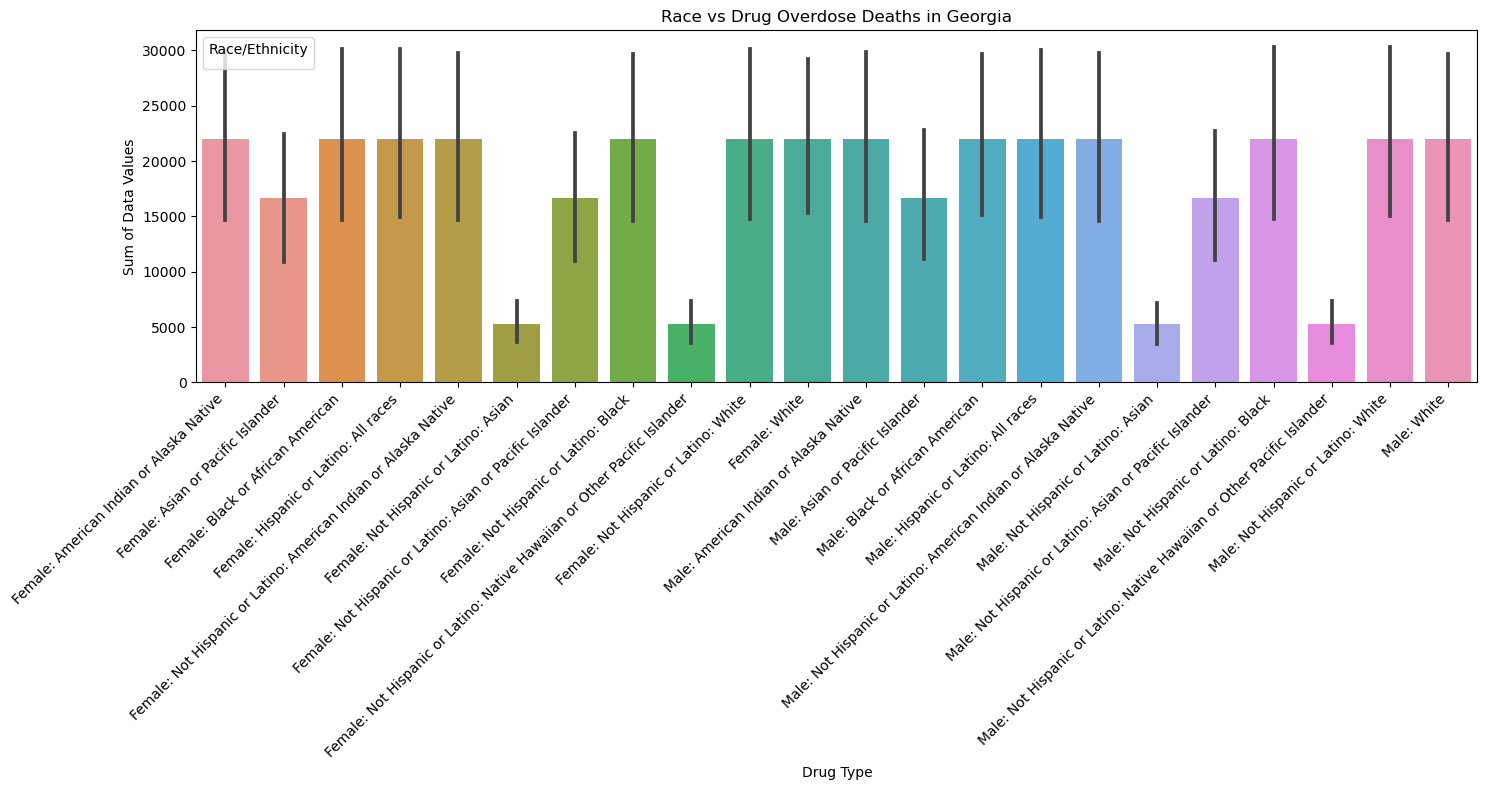

In [50]:
# Creating a graph for Race vs Drug Overdose in Georgia
age_groups_to_exclude = [
    'Under 15 years', '15-24 years', '25-34 years', '35-44 years', 
    '45-54 years', '55-64 years', '65-74 years', '75-84 years', 
    '85 years and over'
]
# Creating a bar plot for the specific drug types without age groups
age_groups_to_exclude_regex = '|'.join(age_groups_to_exclude)

filtered_data_corrected = combined_data_filtered[
    ~combined_data_filtered['STUB_LABEL'].str.contains(age_groups_to_exclude_regex, case=False, na=False) &
    (combined_data_filtered['Race'] != 'Unknown')
]
# Filtering the data for Georgia
georgia_data = filtered_data_corrected[combined_data_filtered['State'] == 'GA']

# Creating a pivot table for Georgia data
pivot_georgia_race_drug = georgia_data.pivot_table(index='Indicator', columns='STUB_LABEL', values='Data Value', aggfunc='sum', fill_value=0)

# Plotting the graph
plt.figure(figsize=(15, 8))
sns.barplot(data=pivot_georgia_race_drug)
plt.title('Race vs Drug Overdose Deaths in Georgia')
plt.xlabel('Drug Type')
plt.ylabel('Sum of Data Values')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race/Ethnicity', loc='upper left')
plt.tight_layout()

plt.show()


In [53]:
georgia_data.head()

Year State       Indicator  PANEL_NUM  Data Value  \
247323  2015    GA  Heroin (T40.1)        5.0         NaN   
247324  2015    GA  Heroin (T40.1)        5.0         NaN   
247325  2015    GA  Heroin (T40.1)        5.0         NaN   
247326  2015    GA  Heroin (T40.1)        5.0         NaN   
247327  2015    GA  Heroin (T40.1)        5.0         NaN   

                                    STUB_LABEL       AGE  ESTIMATE  \
247323                             Male: White  All ages       7.2   
247324         Male: Black or African American  All ages       5.0   
247325  Male: American Indian or Alaska Native  All ages       4.0   
247326         Male: Asian or Pacific Islander  All ages       0.8   
247327                           Female: White  All ages       2.3   

                                    Race  
247323                             White  
247324         Black or African American  
247325  American Indian or Alaska Native  
247326         Asian or Pacific Islander  
247327                             White

C:\Users\Checkout\AppData\Local\Temp\ipykernel_22884\505723344.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Indicator', y='value', hue='Race', data=georgia_melted_filtered, ci=None)


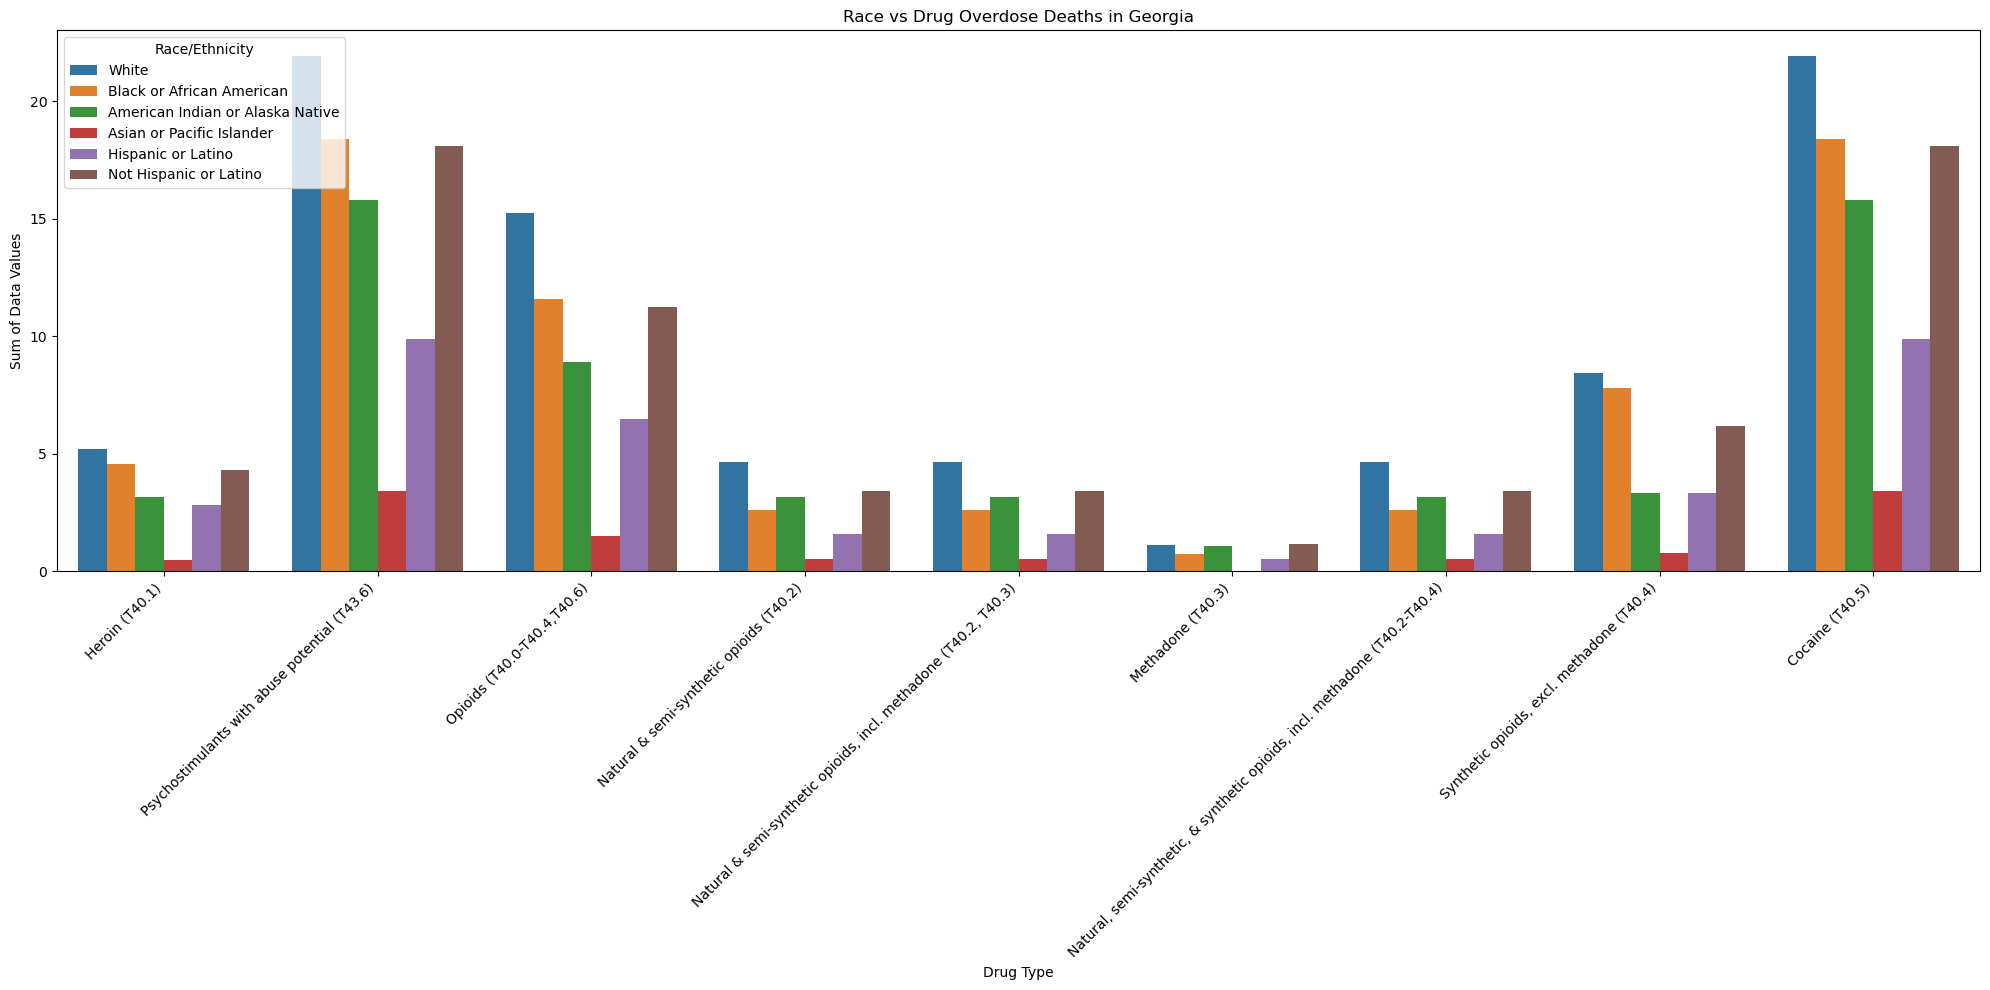

In [56]:
# It appears there was a KeyError, possibly due to incorrect column naming.
# Let's correct this and try plotting again.

# We will use the 'ESTIMATE' column for the values, as 'Data Value' seems to be causing issues.
georgia_melted = georgia_data.melt(id_vars=['Indicator', 'Race'], value_vars=['ESTIMATE'])

# Filtering out rows with NaN values in 'ESTIMATE'
georgia_melted_filtered = georgia_melted.dropna(subset=['value'])

# Plotting the graph
plt.figure(figsize=(20, 10))
sns.barplot(x='Indicator', y='value', hue='Race', data=georgia_melted_filtered, ci=None)
plt.title('Race vs Drug Overdose Deaths in Georgia')
plt.xlabel('Drug Type')
plt.ylabel('Sum of Data Values')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race/Ethnicity', loc='upper left')
plt.tight_layout()

plt.show()
